In [1]:
!unzip dataset.zip

Archive:  dataset.zip
replace словарь_соцдема.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12





In [18]:

print("ЗАГРУЗКА И БАЗОВЫЙ АНАЛИЗ")



df = pd.read_csv('датасет_new.csv')
dict_df = pd.read_csv('словарь_соцдема.csv')


df.columns = ['timestamp', 'screen', 'functionality', 'action',
              'device_id', 'session_id', 'manufacturer',
              'model', 'device_type', 'os']

dict_df.columns = ['device_id', 'age', 'gender']

print(f"\nРазмер основного датасета: {df.shape}")
print(f"Количество строк: {df.shape[0]:,}")
print(f"Количество столбцов: {df.shape[1]}")
print(f"\nРазмер словаря: {dict_df.shape}")
print(f"Уникальных пользователей: {dict_df['device_id'].nunique():,}")



print("ИНФОРМАЦИЯ О ДАТАСЕТЕ:")

print(df.info())



print("СТАТИСТИКА ПО ЧИСЛОВЫМ СТОЛБЦАМ:")

print(df.describe().T)



print("СТАТИСТИКА ПО КАТЕГОРИАЛЬНЫМ СТОЛБЦАМ:")

categorical_cols = ['screen', 'functionality', 'action', 'manufacturer',
                    'model', 'device_type', 'os']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(f"  Уникальных значений: {df[col].nunique()}")
        print(f"  Топ-5 самых частых:")
        for val, count in df[col].value_counts().head().items():
            print(f"    {val}: {count:,} ({count/len(df)*100:.1f}%)")

ЗАГРУЗКА И БАЗОВЫЙ АНАЛИЗ

Размер основного датасета: (6269242, 10)
Количество строк: 6,269,242
Количество столбцов: 10

Размер словаря: (180341, 3)
Уникальных пользователей: 180,341
ИНФОРМАЦИЯ О ДАТАСЕТЕ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269242 entries, 0 to 6269241
Data columns (total 10 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   timestamp      object
 1   screen         object
 2   functionality  object
 3   action         object
 4   device_id      int64 
 5   session_id     int64 
 6   manufacturer   object
 7   model          object
 8   device_type    object
 9   os             object
dtypes: int64(2), object(8)
memory usage: 478.3+ MB
None
СТАТИСТИКА ПО ЧИСЛОВЫМ СТОЛБЦАМ:
                count          mean           std           min           25%  \
device_id   6269242.0  5.940995e+04  45758.020465  1.000000e+00  2.255000e+04   
session_id  6269242.0  1.000000e+10    847.857164  1.000000e+10  1.000000e+10   

                     50

In [19]:

print(" АНАЛИЗ ВРЕМЕННЫХ ДАННЫХ")



df['timestamp'] = pd.to_datetime(
    df['timestamp'].str.extract(r'(\d{4}-\d{2}-\d{2}T\d{2}:\d{2}:\d{2})')[0]
)


df['date'] = df['timestamp'].dt.date
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)
df['week_number'] = df['timestamp'].dt.isocalendar().week


print(f"\nВременной диапазон данных:")
print(f"  Начало: {df['timestamp'].min()}")
print(f"  Конец:  {df['timestamp'].max()}")
print(f"  Длительность: {df['timestamp'].max() - df['timestamp'].min()}")


date_range = pd.date_range(start=df['timestamp'].min().date(),
                           end=df['timestamp'].max().date())
missing_dates = [d for d in date_range if d.date() not in df['date'].unique()]
print(f"\nДней в данных: {len(df['date'].unique())}")
print(f"Пропущенных дней: {len(missing_dates)}")
if missing_dates:
    print(f"Пропущенные даты: {missing_dates[:5]}...")

 АНАЛИЗ ВРЕМЕННЫХ ДАННЫХ

Временной диапазон данных:
  Начало: 2025-09-01 00:00:05
  Конец:  2025-10-31 23:59:54
  Длительность: 60 days 23:59:49

Дней в данных: 62
Пропущенных дней: 0


ВРЕМЕННЫЕ ЗАКОНОМЕРНОСТИ

Создание данных для визуализации...
✓ Данные для визуализации созданы
  • Ежедневная активность: 61 дней
  • Почасовая активность: 24 часов
  • Дней недели: 7


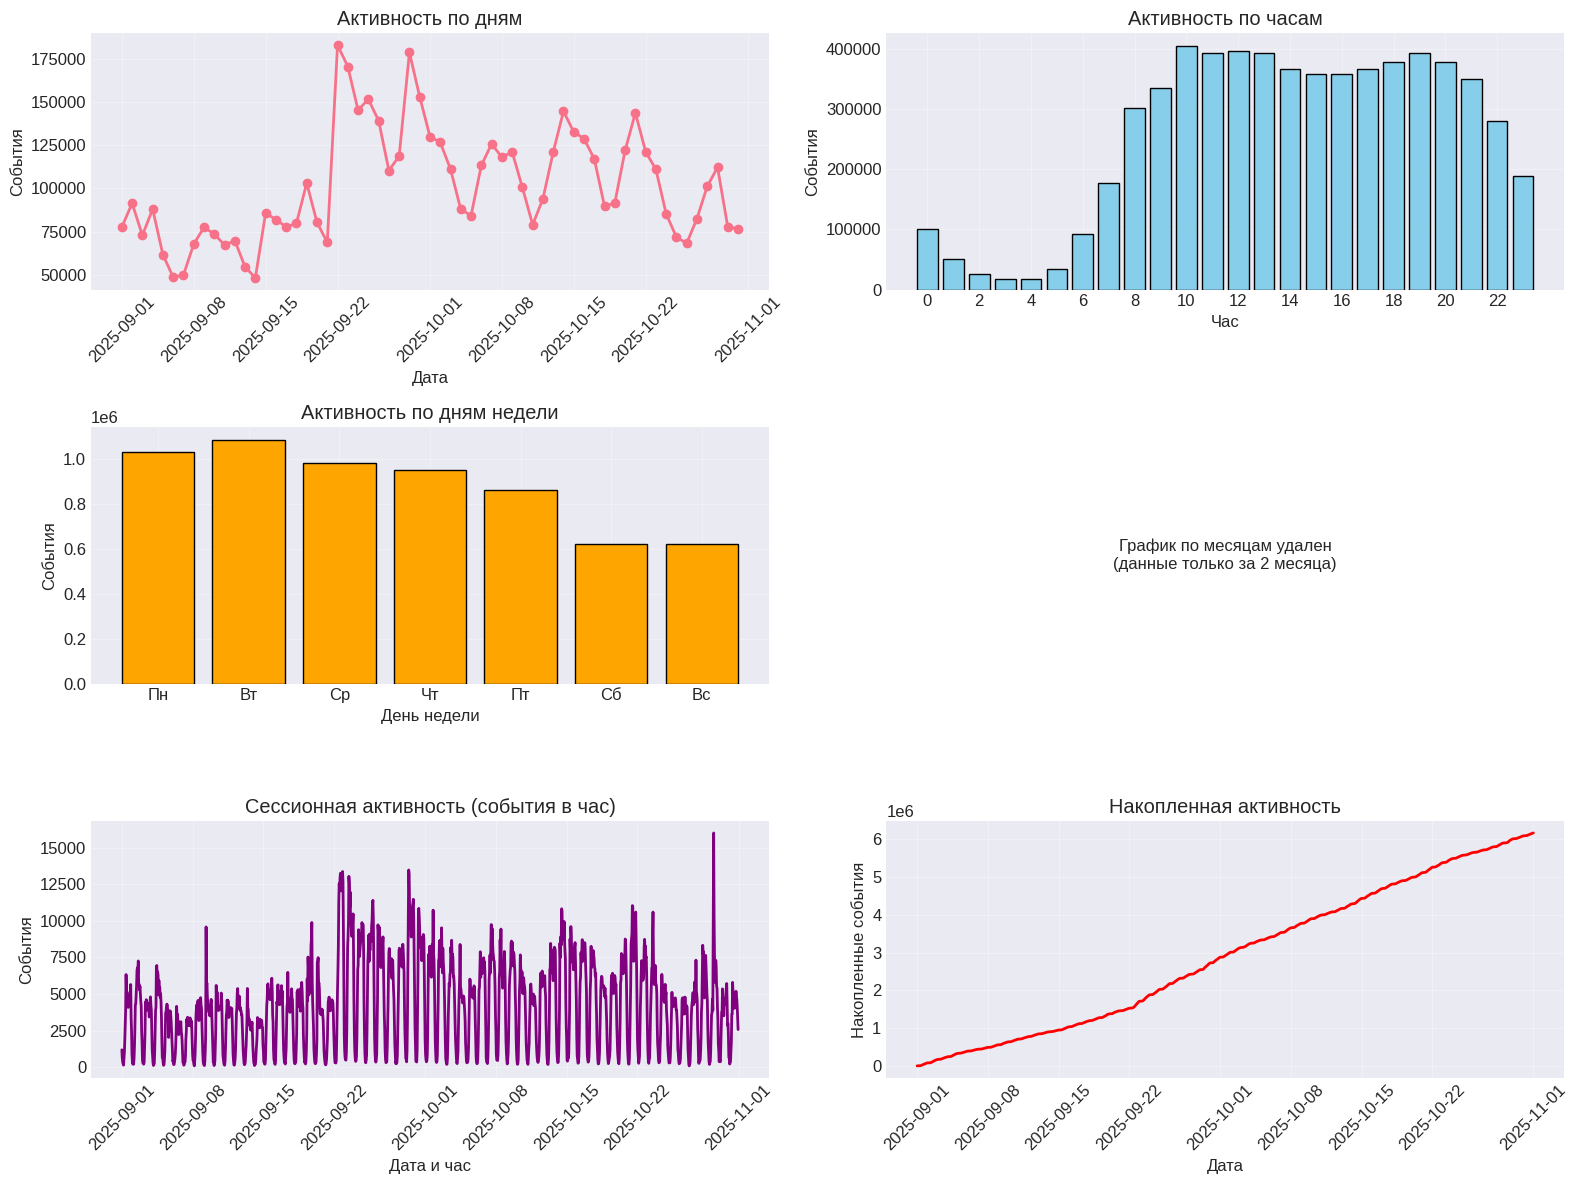


Статистика временной активности:
Среднее событий в день: 101054
Максимум событий в день: 182897
Минимум событий в день: 48215
Стандартное отклонение: 32345
Всего дней с данными: 61
Самый активный час: 10:00 (405,846 событий)
Самый активный день недели: Вт

Дополнительная статистика:
Всего часов с данными: 24
Среднее событий в час: 256846
Самый активный день: 22.09.2025 (182,897 событий)
Самый неактивный день: 14.09.2025 (48,215 событий)


In [22]:
print("ВРЕМЕННЫЕ ЗАКОНОМЕРНОСТИ")


print("\nСоздание данных для визуализации...")

# Ежедневная активность
daily_activity = df.groupby('date').size().reset_index(name='events')
daily_activity['date'] = pd.to_datetime(daily_activity['date'])

# Почасовая активность
hourly_activity = df.groupby('hour').size().reset_index(name='events')

# Активность по дням недели
weekly_activity = df.groupby('day_of_week').size().reset_index(name='events')
weekly_activity['day_of_week'] = weekly_activity['day_of_week'].astype(int)

# Сессионная активность по часам
df['date_hour'] = df['timestamp'].dt.floor('H')
hourly_session = df.groupby('date_hour').size().reset_index(name='events')

# Накопленная активность
df_sorted = df.sort_values('timestamp').copy()
df_sorted['cumulative_events'] = range(1, len(df_sorted) + 1)

print("Данные для визуализации созданы")
print(f"  • Ежедневная активность: {len(daily_activity)} дней")
print(f"  • Почасовая активность: {len(hourly_activity)} часов")
print(f"  • Дней недели: {len(weekly_activity)}")

fig, axes = plt.subplots(3, 2, figsize=(16, 12))

# Активность по дням
axes[0, 0].plot(daily_activity['date'], daily_activity['events'], marker='o', linewidth=2)
axes[0, 0].set_title('Активность по дням')
axes[0, 0].set_xlabel('Дата')
axes[0, 0].set_ylabel('События')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3)

# Активность по часам
axes[0, 1].bar(hourly_activity['hour'], hourly_activity['events'], color='skyblue', edgecolor='black')
axes[0, 1].set_title('Активность по часам')
axes[0, 1].set_xlabel('Час')
axes[0, 1].set_ylabel('События')
axes[0, 1].set_xticks(range(0, 24, 2))
axes[0, 1].grid(True, alpha=0.3)

# Активность по дням недели
weekday_names_short = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
axes[1, 0].bar(range(7), weekly_activity['events'], color='orange', edgecolor='black')
axes[1, 0].set_title('Активность по дням недели')
axes[1, 0].set_xlabel('День недели')
axes[1, 0].set_ylabel('События')
axes[1, 0].set_xticks(range(7))
axes[1, 0].set_xticklabels(weekday_names_short)
axes[1, 0].grid(True, alpha=0.3)

# Пустой график (активность по месяцам) так как там надо преобразовать
axes[1, 1].axis('off')
axes[1, 1].text(0.5, 0.5, 'График по месяцам удален\n(данные только за 2 месяца)',
               ha='center', va='center', fontsize=12)

# Сессионная активность (события в час)
axes[2, 0].plot(hourly_session['date_hour'], hourly_session['events'], linewidth=2, color='purple')
axes[2, 0].set_title('Сессионная активность (события в час)')
axes[2, 0].set_xlabel('Дата и час')
axes[2, 0].set_ylabel('События')
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 0].grid(True, alpha=0.3)

# Накопленная активность
axes[2, 1].plot(df_sorted['timestamp'], df_sorted['cumulative_events'], linewidth=2, color='red')
axes[2, 1].set_title('Накопленная активность')
axes[2, 1].set_xlabel('Дата')
axes[2, 1].set_ylabel('Накопленные события')
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистика
print("\nСтатистика временной активности:")
print(f"Среднее событий в день: {daily_activity['events'].mean():.0f}")
print(f"Максимум событий в день: {daily_activity['events'].max():.0f}")
print(f"Минимум событий в день: {daily_activity['events'].min():.0f}")
print(f"Стандартное отклонение: {daily_activity['events'].std():.0f}")
print(f"Всего дней с данными: {len(daily_activity)}")
print(f"Самый активный час: {int(hourly_activity.loc[hourly_activity['events'].idxmax(), 'hour'])}:00 ({hourly_activity['events'].max():,} событий)")
print(f"Самый активный день недели: {weekday_names_short[weekly_activity.loc[weekly_activity['events'].idxmax(), 'day_of_week']]}")

print(f"\nДополнительная статистика:")
print(f"Всего часов с данными: {len(hourly_activity)}")
print(f"Среднее событий в час: {hourly_activity['events'].mean():.0f}")
print(f"Самый активный день: {daily_activity.loc[daily_activity['events'].idxmax(), 'date'].strftime('%d.%m.%Y')} ({daily_activity['events'].max():,} событий)")
print(f"Самый неактивный день: {daily_activity.loc[daily_activity['events'].idxmin(), 'date'].strftime('%d.%m.%Y')} ({daily_activity['events'].min():,} событий)")

АНАЛИЗ МЕСЯЧНОЙ АКТИВНОСТИ

СТАТИСТИКА ПО ПОЛЮ 'month':
Всего строк: 6,269,242
NaN значений: 104,939 (1.7%)
Уникальных значений: 2

НЕНУЛЕВЫЕ ЗНАЧЕНИЯ МЕСЯЦЕВ:
Уникальные месяцы: [ 9. 10.]
Тип данных: float64

ПЕРВЫЕ 5 СТРОК С NaN В МЕСЯЦАХ:
    timestamp  month        screen    functionality
470       NaT    NaN           Еще  Открытие экрана
471       NaT    NaN           Еще  Открытие экрана
532       NaT    NaN           Еще  Открытие экрана
533       NaT    NaN           Еще  Открытие экрана
554       NaT    NaN  Новая заявка  Открытие экрана
ИСПРАВЛЕНИЕ МЕСЯЦЕВ ИЗ TIMESTAMP

Месяцы извлечены из timestamp
NaN в новом поле: 104939

СРАВНЕНИЕ ИСХОДНЫХ И ИСПРАВЛЕННЫХ МЕСЯЦЕВ:
Строк для сравнения: 6,164,303
Совпадающих значений: 6,164,303 (100.0%)
Несовпадающих значений: 0
АНАЛИЗ СТРОК С ПРОПУЩЕННЫМИ МЕСЯЦАМИ

ХАРАКТЕРИСТИКИ СТРОК С ПРОПУЩЕННЫМИ МЕСЯЦАМИ:
Количество: 104,939 строк
Доля от общего объема: 1.7%

РАСПРЕДЕЛЕНИЕ ПО ДРУГИМ ПРИЗНАКАМ:

Экраны (топ-5):
  Еще: 52,743 (50.3%)
  

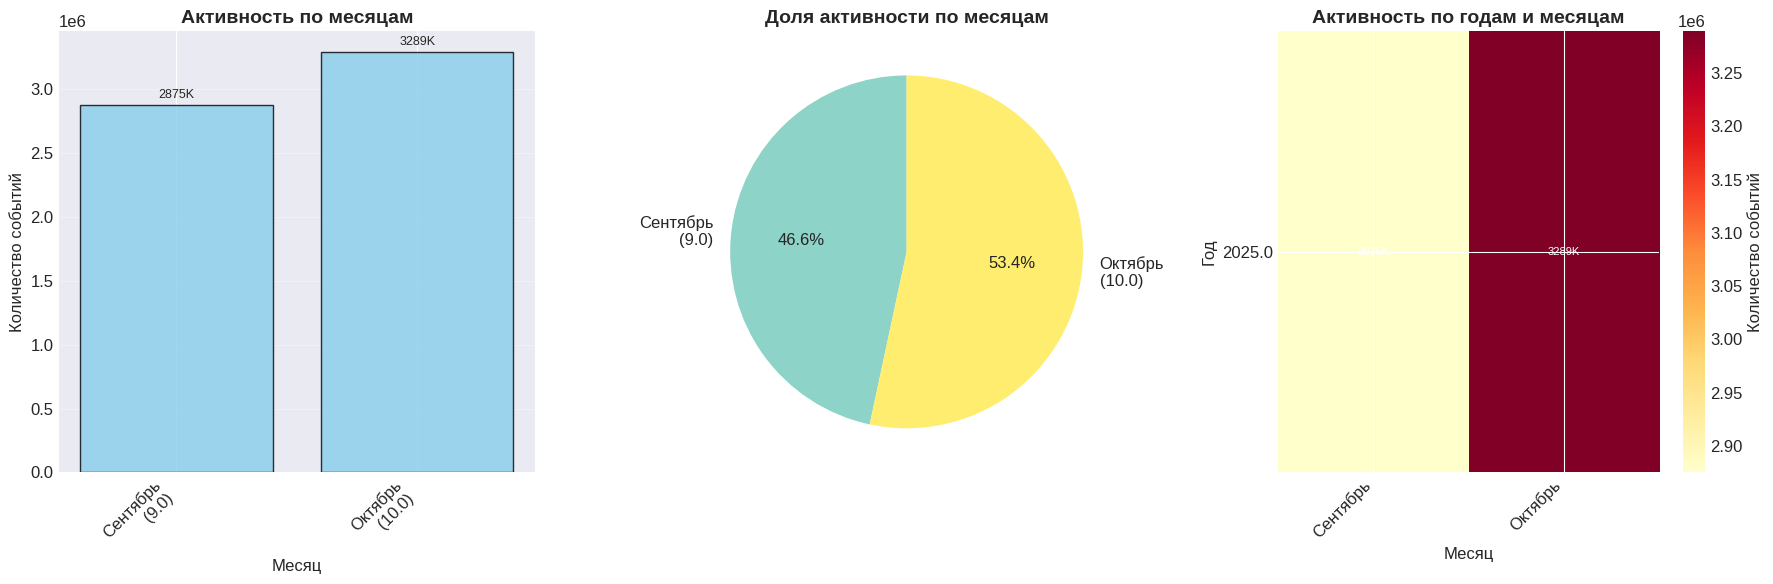

СТАТИСТИЧЕСКИЙ АНАЛИЗ МЕСЯЧНОЙ АКТИВНОСТИ

ОСНОВНЫЕ СТАТИСТИКИ:
• Всего месяцев в данных: 2
• Всего событий: 6,269,242
• Среднее событий в месяц: 3082152
• Медиана: 3082152
• Стандартное отклонение: 292538

ПИКОВЫЙ МЕСЯЦ:
  Октябрь: 3,289,007 событий
  Доля от общего объема: 52.5%

МИНИМАЛЬНЫЙ МЕСЯЦ:
  Сентябрь: 2,875,296 событий
  Доля от общего объема: 45.9%

РАЗНИЦА МЕЖДУ ПИКОМ И МИНИМУМОМ:
  Абсолютная: 413,711 событий
  Относительная: 14.4%

РАСПРЕДЕЛЕНИЕ АКТИВНОСТИ:
  25-й перцентиль: 2978724 событий
  75-й перцентиль: 3185579 событий
  IQR (межквартильный размах): 206856 событий
СЕЗОННЫЙ АНАЛИЗ
Недостаточно данных для сезонного анализа
АНАЛИЗ ТИПОВ АКТИВНОСТИ ПО МЕСЯЦАМ

САМЫЕ ПОПУЛЯРНЫЕ ФУНКЦИИ ПО МЕСЯЦАМ:

  Сентябрь:
    Открытие экрана: 1,439,515 событий
    1. Открытие экрана: 1,439,515 (50.1%)
    2. Просмотр уведомления: 223,372 (7.8%)
    3. Переход в раздел 'Заявки': 175,654 (6.1%)

  Октябрь:
    Открытие экрана: 1,747,481 событий
    1. Открытие экрана: 1,747,481 (53.

In [23]:

print("АНАЛИЗ МЕСЯЧНОЙ АКТИВНОСТИ")

print("\nСТАТИСТИКА ПО ПОЛЮ 'month':")
print(f"Всего строк: {len(df):,}")
print(f"NaN значений: {df['month'].isna().sum():,} ({df['month'].isna().sum()/len(df)*100:.1f}%)")
print(f"Уникальных значений: {df['month'].nunique()}")

print("\nНЕНУЛЕВЫЕ ЗНАЧЕНИЯ МЕСЯЦЕВ:")
non_null_months = df['month'].dropna().unique()
print(f"Уникальные месяцы: {non_null_months}")
print(f"Тип данных: {non_null_months.dtype}")

print("\nПЕРВЫЕ 5 СТРОК С NaN В МЕСЯЦАХ:")
nan_samples = df[df['month'].isna()].head()
print(nan_samples[['timestamp', 'month', 'screen', 'functionality']])

print("ИСПРАВЛЕНИЕ МЕСЯЦЕВ ИЗ TIMESTAMP")

df['month_from_timestamp'] = df['timestamp'].dt.month
df['year_from_timestamp'] = df['timestamp'].dt.year

print(f"\nМесяцы извлечены из timestamp")
print(f"NaN в новом поле: {df['month_from_timestamp'].isna().sum()}")

print("\nСРАВНЕНИЕ ИСХОДНЫХ И ИСПРАВЛЕННЫХ МЕСЯЦЕВ:")
comparison = df[['month', 'month_from_timestamp']].dropna(subset=['month'])
comparison['diff'] = comparison['month'] - comparison['month_from_timestamp']

print(f"Строк для сравнения: {len(comparison):,}")
print(f"Совпадающих значений: {(comparison['diff'] == 0).sum():,} ({(comparison['diff'] == 0).sum()/len(comparison)*100:.1f}%)")
print(f"Несовпадающих значений: {(comparison['diff'] != 0).sum():,}")

if (comparison['diff'] != 0).sum() > 0:
    print("\nЕсть расхождения между исходными и исправленными месяцами:")
    mismatches = comparison[comparison['diff'] != 0].head()
    print(mismatches[['month', 'month_from_timestamp', 'diff']])


print("АНАЛИЗ СТРОК С ПРОПУЩЕННЫМИ МЕСЯЦАМИ")


nan_rows = df[df['month'].isna()]
print(f"\nХАРАКТЕРИСТИКИ СТРОК С ПРОПУЩЕННЫМИ МЕСЯЦАМИ:")
print(f"Количество: {len(nan_rows):,} строк")
print(f"Доля от общего объема: {len(nan_rows)/len(df)*100:.1f}%")

if len(nan_rows) > 0:
    print("\nРАСПРЕДЕЛЕНИЕ ПО ДРУГИМ ПРИЗНАКАМ:")


    print("\nЭкраны (топ-5):")
    top_screens_nan = nan_rows['screen'].value_counts().head()
    for screen, count in top_screens_nan.items():
        print(f"  {screen}: {count:,} ({count/len(nan_rows)*100:.1f}%)")


    print("\nФункции (топ-5):")
    top_funcs_nan = nan_rows['functionality'].value_counts().head()
    for func, count in top_funcs_nan.items():
        print(f"  {func}: {count:,} ({count/len(nan_rows)*100:.1f}%)")


    print("\nВремя суток:")
    nan_rows['hour'] = nan_rows['timestamp'].dt.hour
    time_dist_nan = nan_rows['hour'].value_counts().sort_index()
    for hour, count in time_dist_nan.head(5).items():
        print(f"  {int(hour)}:00: {count:,} событий")



print("ОПРЕДЕЛЕНИЕ РАБОЧЕГО ПОЛЯ ДЛЯ АНАЛИЗА")

df['month_final'] = df['month_from_timestamp']

print("Используем 'month_final' для анализа")


print("ВИЗУАЛИЗАЦИЯ МЕСЯЧНОЙ АКТИВНОСТИ")

month_stats = df['month_final'].value_counts().sort_index()

month_names = {
    1: 'Январь', 2: 'Февраль', 3: 'Март', 4: 'Апрель',
    5: 'Май', 6: 'Июнь', 7: 'Июль', 8: 'Август',
    9: 'Сентябрь', 10: 'Октябрь', 11: 'Ноябрь', 12: 'Декабрь'
}

print("\nАКТИВНОСТЬ ПО МЕСЯЦАМ:")
for month_num in sorted(month_stats.index):
    count = month_stats[month_num]
    month_name = month_names.get(month_num, f"Месяц {month_num}")
    percentage = count / len(df) * 100
    print(f"  {month_name} ({month_num}): {count:,} событий ({percentage:.1f}%)")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# диаграмма по месяцам
month_nums = list(month_stats.index)
month_labels = [f"{month_names.get(m, m)}\n({m})" for m in month_nums]

axes[0].bar(month_nums, month_stats.values, color='skyblue', edgecolor='black', alpha=0.8)
axes[0].set_title('Активность по месяцам', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Месяц', fontsize=12)
axes[0].set_ylabel('Количество событий', fontsize=12)
axes[0].set_xticks(month_nums)
axes[0].set_xticklabels(month_labels, rotation=45, ha='right')
axes[0].grid(True, alpha=0.3, axis='y')


for i, (month, count) in enumerate(zip(month_nums, month_stats.values)):
    axes[0].text(month, count + max(month_stats.values)*0.01,
                f'{count/1000:.0f}K',
                ha='center', va='bottom', fontsize=9)

#  Круговая диаграмма
axes[1].pie(month_stats.values, labels=month_labels, autopct='%1.1f%%',
           startangle=90, colors=plt.cm.Set3(np.linspace(0, 1, len(month_nums))))
axes[1].set_title('Доля активности по месяцам', fontsize=14, fontweight='bold')

#  Анализ по годам и месяцам
if len(df['year_from_timestamp'].unique()) > 1:
    # Создаем heatmap
    year_month_data = df.groupby(['year_from_timestamp', 'month_final']).size().unstack()

    im = axes[2].imshow(year_month_data, aspect='auto', cmap='YlOrRd')
    axes[2].set_title('Активность по годам и месяцам', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Месяц', fontsize=12)
    axes[2].set_ylabel('Год', fontsize=12)

    axes[2].set_xticks(range(len(month_nums)))
    axes[2].set_xticklabels([month_names.get(m, m) for m in month_nums], rotation=45, ha='right')
    axes[2].set_yticks(range(len(year_month_data.index)))
    axes[2].set_yticklabels(year_month_data.index)

    plt.colorbar(im, ax=axes[2], label='Количество событий')

    for i in range(len(year_month_data.index)):
        for j in range(len(year_month_data.columns)):
            value = year_month_data.iloc[i, j]
            if not pd.isna(value):
                axes[2].text(j, i, f'{value/1000:.0f}K',
                           ha='center', va='center',
                           color='white' if value > year_month_data.values.max()/2 else 'black',
                           fontsize=8)
else:

    axes[2].plot(month_nums, month_stats.values, marker='o', linewidth=2, color='green')
    axes[2].set_title('Тренд активности по месяцам', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Месяц', fontsize=12)
    axes[2].set_ylabel('Количество событий', fontsize=12)
    axes[2].set_xticks(month_nums)
    axes[2].set_xticklabels([month_names.get(m, m) for m in month_nums], rotation=45, ha='right')
    axes[2].grid(True, alpha=0.3)


    if len(month_nums) > 1:
        z = np.polyfit(month_nums, month_stats.values, 1)
        p = np.poly1d(z)
        axes[2].plot(month_nums, p(month_nums), "r--", alpha=0.5, label=f'Тренд: {"рост" if z[0] > 0 else "снижение"}')
        axes[2].legend()

plt.tight_layout()
plt.show()


print("СТАТИСТИЧЕСКИЙ АНАЛИЗ МЕСЯЧНОЙ АКТИВНОСТИ")

print("\nОСНОВНЫЕ СТАТИСТИКИ:")
print(f"• Всего месяцев в данных: {len(month_stats)}")
print(f"• Всего событий: {len(df):,}")
print(f"• Среднее событий в месяц: {month_stats.mean():.0f}")
print(f"• Медиана: {month_stats.median():.0f}")
print(f"• Стандартное отклонение: {month_stats.std():.0f}")


max_month_num = month_stats.idxmax()
max_month_count = month_stats.max()
min_month_num = month_stats.idxmin()
min_month_count = month_stats.min()

print(f"\nПИКОВЫЙ МЕСЯЦ:")
print(f"  {month_names.get(max_month_num, max_month_num)}: {max_month_count:,} событий")
print(f"  Доля от общего объема: {max_month_count/len(df)*100:.1f}%")

print(f"\nМИНИМАЛЬНЫЙ МЕСЯЦ:")
print(f"  {month_names.get(min_month_num, min_month_num)}: {min_month_count:,} событий")
print(f"  Доля от общего объема: {min_month_count/len(df)*100:.1f}%")


diff_absolute = max_month_count - min_month_count
diff_relative = (max_month_count / min_month_count - 1) * 100

print(f"\nРАЗНИЦА МЕЖДУ ПИКОМ И МИНИМУМОМ:")
print(f"  Абсолютная: {diff_absolute:,} событий")
print(f"  Относительная: {diff_relative:.1f}%")


print(f"\nРАСПРЕДЕЛЕНИЕ АКТИВНОСТИ:")
q25 = month_stats.quantile(0.25)
q75 = month_stats.quantile(0.75)
print(f"  25-й перцентиль: {q25:.0f} событий")
print(f"  75-й перцентиль: {q75:.0f} событий")
print(f"  IQR (межквартильный размах): {q75 - q25:.0f} событий")



print("СЕЗОННЫЙ АНАЛИЗ")

if len(month_stats) >= 3:

    season_mapping = {
        12: 'Зима', 1: 'Зима', 2: 'Зима',
        3: 'Весна', 4: 'Весна', 5: 'Весна',
        6: 'Лето', 7: 'Лето', 8: 'Лето',
        9: 'Осень', 10: 'Осень', 11: 'Осень'
    }

    df['season'] = df['month_final'].map(season_mapping)
    season_stats = df['season'].value_counts()

    print("\nАКТИВНОСТЬ ПО СЕЗОНАМ:")
    for season, count in season_stats.items():
        percentage = count / len(df) * 100
        print(f"  {season}: {count:,} событий ({percentage:.1f}%)")


    max_season = season_stats.idxmax()
    min_season = season_stats.idxmin()

    print(f"\nСЕЗОННЫЕ РЕКОМЕНДАЦИИ:")
    print(f"1. ПОДГОТОВКА К {max_season.upper()}:")
    print(f"   • Пиковая активность ({season_stats[max_season]/len(df)*100:.1f}%)")
    print(f"   • Увеличить мощности инфраструктуры")
    print(f"   • Подготовить дополнительную поддержку")

    print(f"\n2. ОПТИМИЗАЦИЯ В {min_season.upper()}:")
    print(f"   • Минимальная активность ({season_stats[min_season]/len(df)*100:.1f}%)")
    print(f"   • Время для обновлений")
    print(f"   • Тестирование новых функций")

else:
    print("Недостаточно данных для сезонного анализа")


print("АНАЛИЗ ТИПОВ АКТИВНОСТИ ПО МЕСЯЦАМ")


month_function_matrix = pd.crosstab(df['month_final'], df['functionality'])

print("\nСАМЫЕ ПОПУЛЯРНЫЕ ФУНКЦИИ ПО МЕСЯЦАМ:")
for month in sorted(month_function_matrix.index):
    top_function = month_function_matrix.loc[month].idxmax()
    top_count = month_function_matrix.loc[month].max()
    month_name = month_names.get(month, f"Месяц {month}")

    print(f"\n  {month_name}:")
    print(f"    {top_function}: {top_count:,} событий")

    # Топ-3 функции
    top_3 = month_function_matrix.loc[month].nlargest(3)
    for i, (func, count) in enumerate(top_3.items(), 1):
        percentage = count / month_function_matrix.loc[month].sum() * 100
        print(f"    {i}. {func}: {count:,} ({percentage:.1f}%)")



print("ИТОГОВЫЕ ВЫВОДЫ ПО МЕСЯЧНОЙ АКТИВНОСТИ")


print(f"\nКЛЮЧЕВЫЕ НАХОДКИ:")
print(f"1. Данные охватывают {len(month_stats)} месяца")
print(f"2. Обнаружено {df['month'].isna().sum():,} пропусков в исходном поле 'month'")
print(f"3. Месяцы успешно восстановлены из временных меток")

print(f"\nРАСПРЕДЕЛЕНИЕ АКТИВНОСТИ:")
print(f"• Максимум: {max_month_count:,} в {month_names.get(max_month_num, max_month_num)}")
print(f"• Минимум: {min_month_count:,} в {month_names.get(min_month_num, min_month_num)}")
print(f"• Разница: {diff_relative:.1f}%")

print(f"\nРЕКОМЕНДАЦИИ:")
print(f"1. Мониторинг нагрузки: фокус на {month_names.get(max_month_num, max_month_num)}")
print(f"2. Планирование обновлений: использовать {month_names.get(min_month_num, min_month_num)}")
print(f"3. Анализ причин пропусков: {df['month'].isna().sum():,} строк требуют проверки")


print(f"\nСОХРАНЕНИЕ РЕЗУЛЬТАТОВ...")
month_analysis_results = {
    'month_stats': month_stats.to_dict(),
    'max_month': {'number': max_month_num, 'name': month_names.get(max_month_num), 'count': int(max_month_count)},
    'min_month': {'number': min_month_num, 'name': month_names.get(min_month_num), 'count': int(min_month_count)},
    'na_count': int(df['month'].isna().sum()),
    'total_events': int(len(df))
}

import json
with open('monthly_activity_analysis.json', 'w', encoding='utf-8') as f:
    json.dump(month_analysis_results, f, ensure_ascii=False, indent=2)

print("Результаты сохранены в 'monthly_activity_analysis.json'")

АНАЛИЗ УСТРОЙСТВ И ТЕХНОЛОГИЙ


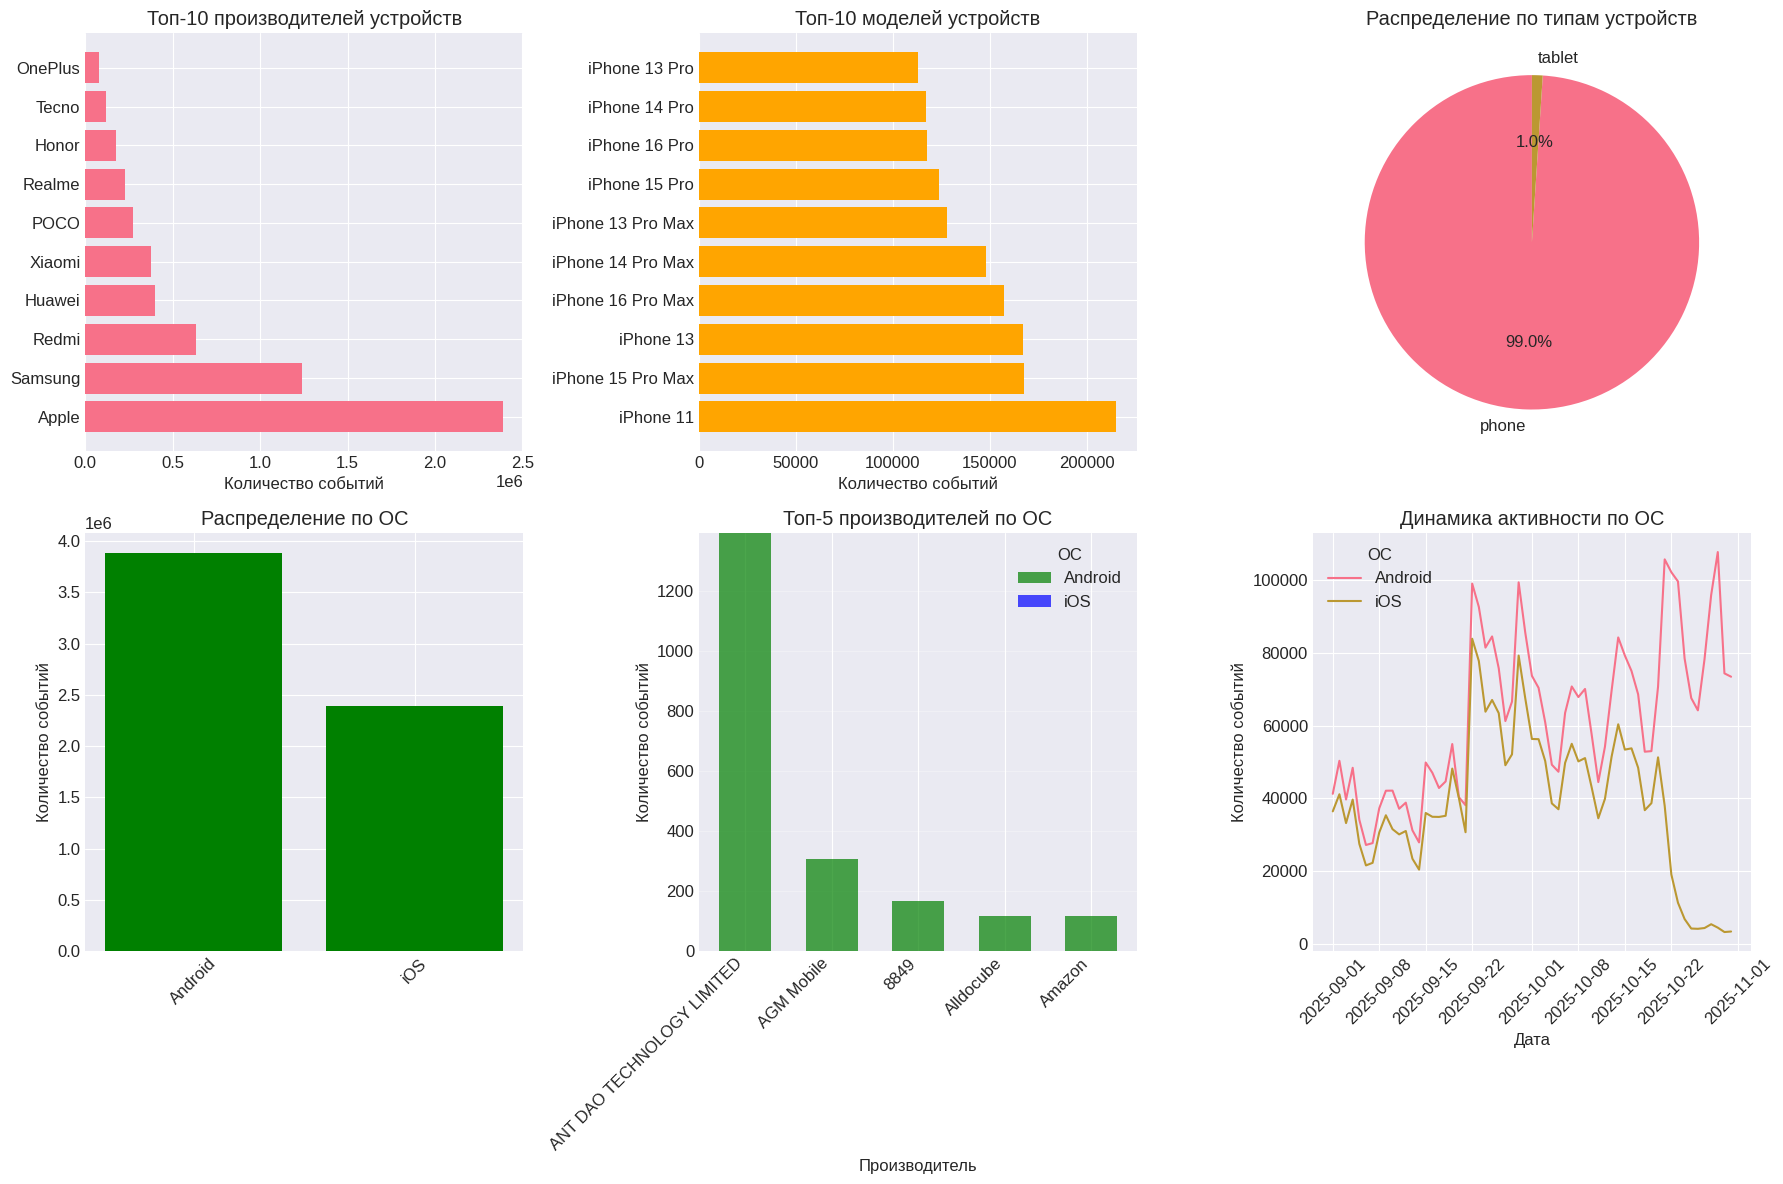


Статистика устройств:
Уникальных производителей: 109
Уникальных моделей: 2059

Доля Android: 61.9%
Доля iOS: 38.1%

Соотношение устройств:
  phone: 6,204,465 (99.0%)
  tablet: 64,777 (1.0%)


In [24]:
print("АНАЛИЗ УСТРОЙСТВ И ТЕХНОЛОГИЙ")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#  Производители устройств (топ-10)
top_manufacturers = df['manufacturer'].value_counts().head(10)
axes[0, 0].barh(range(len(top_manufacturers)), top_manufacturers.values)
axes[0, 0].set_yticks(range(len(top_manufacturers)))
axes[0, 0].set_yticklabels(top_manufacturers.index)
axes[0, 0].set_title('Топ-10 производителей устройств')
axes[0, 0].set_xlabel('Количество событий')

#  Модели устройств (топ-10)
top_models = df['model'].value_counts().head(10)
axes[0, 1].barh(range(len(top_models)), top_models.values, color='orange')
axes[0, 1].set_yticks(range(len(top_models)))
axes[0, 1].set_yticklabels(top_models.index)
axes[0, 1].set_title('Топ-10 моделей устройств')
axes[0, 1].set_xlabel('Количество событий')

#  Типы устройств
device_type_counts = df['device_type'].value_counts()
axes[0, 2].pie(device_type_counts.values, labels=device_type_counts.index,
               autopct='%1.1f%%', startangle=90)
axes[0, 2].set_title('Распределение по типам устройств')

#  Операционные системы
os_counts = df['os'].value_counts()
axes[1, 0].bar(range(len(os_counts)), os_counts.values, color='green')
axes[1, 0].set_xticks(range(len(os_counts)))
axes[1, 0].set_xticklabels(os_counts.index, rotation=45)
axes[1, 0].set_title('Распределение по ОС')
axes[1, 0].set_ylabel('Количество событий')

#  Соотношение ОС по производителям
if 'manufacturer' in df.columns and 'os' in df.columns:
    # Создаем кросс-таблицу производитель vs ОС
    manufacturer_os = pd.crosstab(df['manufacturer'], df['os']).head(10)

    # Берем топ-5 производителей
    top_5_manufacturers = manufacturer_os.sum(axis=1).nlargest(5).index
    manufacturer_os_top = manufacturer_os.loc[top_5_manufacturers]

    x = range(len(manufacturer_os_top))
    width = 0.6

    if 'Android' in manufacturer_os_top.columns:
        axes[1, 1].bar(x, manufacturer_os_top['Android'], width, label='Android', color='green', alpha=0.7)

    if 'iOS' in manufacturer_os_top.columns:
        bottom_values = manufacturer_os_top.get('Android', pd.Series([0]*len(x)))
        axes[1, 1].bar(x, manufacturer_os_top['iOS'], width, bottom=bottom_values,
                      label='iOS', color='blue', alpha=0.7)

    axes[1, 1].set_title('Топ-5 производителей по ОС')
    axes[1, 1].set_xlabel('Производитель')
    axes[1, 1].set_ylabel('Количество событий')
    axes[1, 1].set_xticks(x)
    axes[1, 1].set_xticklabels(manufacturer_os_top.index, rotation=45, ha='right')
    axes[1, 1].legend(title='ОС')
    axes[1, 1].grid(True, alpha=0.3, axis='y')

# Соотношение iOS/Android по активности
if 'os' in df.columns:
    os_time_series = df.groupby(['date', 'os']).size().unstack(fill_value=0)
    os_time_series.plot(ax=axes[1, 2])
    axes[1, 2].set_title('Динамика активности по ОС')
    axes[1, 2].set_xlabel('Дата')
    axes[1, 2].set_ylabel('Количество событий')
    axes[1, 2].legend(title='ОС')
    axes[1, 2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nСтатистика устройств:")
print(f"Уникальных производителей: {df['manufacturer'].nunique()}")
print(f"Уникальных моделей: {df['model'].nunique()}")
print(f"\nДоля Android: {len(df[df['os'] == 'Android'])/len(df)*100:.1f}%")
print(f"Доля iOS: {len(df[df['os'] == 'iOS'])/len(df)*100:.1f}%")
print(f"\nСоотношение устройств:")
for device_type, count in device_type_counts.items():
    print(f"  {device_type}: {count:,} ({count/len(df)*100:.1f}%)")

АНАЛИЗ ЭКРАНОВ И ФУНКЦИОНАЛЬНОСТИ


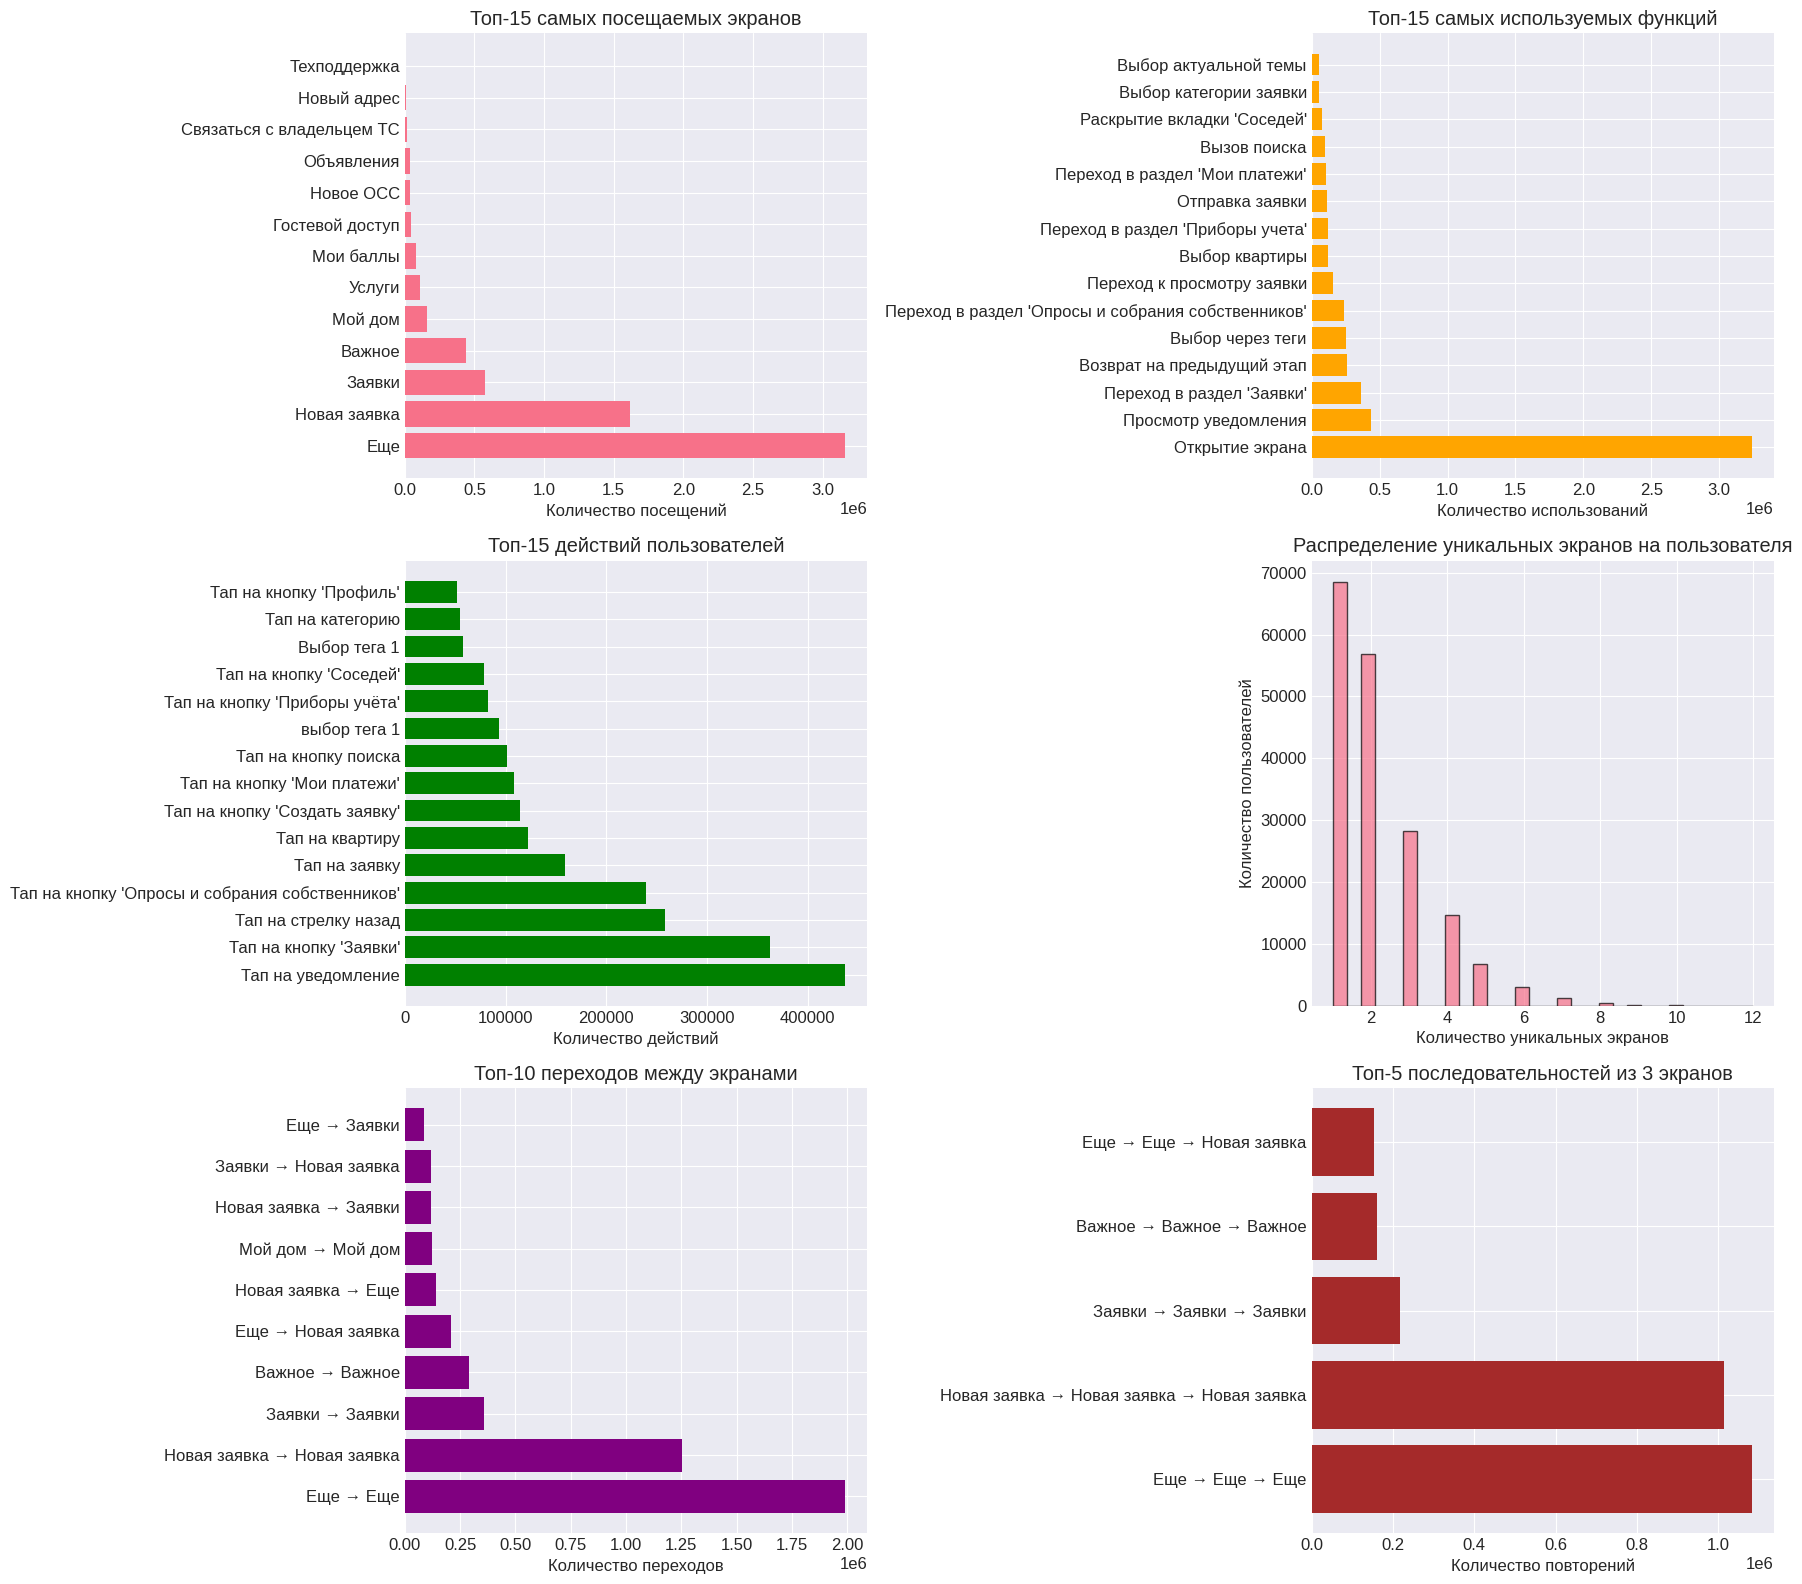


Статистика использования:
Уникальных экранов: 13
Уникальных функций: 158
Уникальных действий: 316
Заполненность действий: 48.1%

Топ-5 экранов по посещаемости:
  Еще: 3,162,219 (50.4%)
  Новая заявка: 1,617,545 (25.8%)
  Заявки: 572,495 (9.1%)
  Важное: 437,070 (7.0%)
  Мой дом: 155,443 (2.5%)

Топ-5 функций по использованию:
  Открытие экрана: 3,241,298 (51.7%)
  Просмотр уведомления: 437,070 (7.0%)
  Переход в раздел 'Заявки': 362,620 (5.8%)
  Возврат на предыдущий этап: 258,090 (4.1%)
  Выбор через теги: 249,918 (4.0%)


In [25]:

print("АНАЛИЗ ЭКРАНОВ И ФУНКЦИОНАЛЬНОСТИ")

fig, axes = plt.subplots(3, 2, figsize=(18, 16))

#  Топ экранов
top_screens = df['screen'].value_counts().head(15)
axes[0, 0].barh(range(len(top_screens)), top_screens.values)
axes[0, 0].set_yticks(range(len(top_screens)))
axes[0, 0].set_yticklabels(top_screens.index)
axes[0, 0].set_title('Топ-15 самых посещаемых экранов')
axes[0, 0].set_xlabel('Количество посещений')

#  Топ функциональностей
top_functions = df['functionality'].value_counts().head(15)
axes[0, 1].barh(range(len(top_functions)), top_functions.values, color='orange')
axes[0, 1].set_yticks(range(len(top_functions)))
axes[0, 1].set_yticklabels(top_functions.index)
axes[0, 1].set_title('Топ-15 самых используемых функций')
axes[0, 1].set_xlabel('Количество использований')

#  Топ действий
if df['action'].notna().any():
    top_actions = df['action'].dropna().value_counts().head(15)
    axes[1, 0].barh(range(len(top_actions)), top_actions.values, color='green')
    axes[1, 0].set_yticks(range(len(top_actions)))
    axes[1, 0].set_yticklabels(top_actions.index)
    axes[1, 0].set_title('Топ-15 действий пользователей')
    axes[1, 0].set_xlabel('Количество действий')

#  Распределение количества уникальных экранов на пользователя
user_screen_counts = df.groupby('device_id')['screen'].nunique()
axes[1, 1].hist(user_screen_counts, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_title('Распределение уникальных экранов на пользователя')
axes[1, 1].set_xlabel('Количество уникальных экранов')
axes[1, 1].set_ylabel('Количество пользователей')

screen_sequences = []
for _, group in df.sort_values('timestamp').groupby(['device_id', 'session_id']):
    screens = group['screen'].tolist()
    for i in range(len(screens) - 1):
        screen_sequences.append((screens[i], screens[i+1]))

if screen_sequences:
    transitions_df = pd.DataFrame(screen_sequences, columns=['from', 'to'])
    top_transitions = transitions_df.groupby(['from', 'to']).size().reset_index(name='count')
    top_transitions = top_transitions.sort_values('count', ascending=False).head(10)

    axes[2, 0].barh(range(len(top_transitions)), top_transitions['count'], color='purple')
    axes[2, 0].set_yticks(range(len(top_transitions)))
    axes[2, 0].set_yticklabels([f"{row['from']} → {row['to']}"
                                for _, row in top_transitions.iterrows()])
    axes[2, 0].set_title('Топ-10 переходов между экранами')
    axes[2, 0].set_xlabel('Количество переходов')

# наиболее частые последовательности
if 'screen' in df.columns:
    sequences_3 = []
    for _, group in df.sort_values('timestamp').groupby(['device_id', 'session_id']):
        screens = group['screen'].tolist()
        if len(screens) >= 3:
            for i in range(len(screens) - 2):
                sequences_3.append(tuple(screens[i:i+3]))

    if sequences_3:
        from collections import Counter
        top_sequences = Counter(sequences_3).most_common(5)

        sequence_labels = [' → '.join(seq) for seq, _ in top_sequences]
        sequence_counts = [count for _, count in top_sequences]

        axes[2, 1].barh(range(len(top_sequences)), sequence_counts, color='brown')
        axes[2, 1].set_yticks(range(len(top_sequences)))
        axes[2, 1].set_yticklabels(sequence_labels)
        axes[2, 1].set_title('Топ-5 последовательностей из 3 экранов')
        axes[2, 1].set_xlabel('Количество повторений')

plt.tight_layout()
plt.show()

print("\nСтатистика использования:")
print(f"Уникальных экранов: {df['screen'].nunique()}")
print(f"Уникальных функций: {df['functionality'].nunique()}")
print(f"Уникальных действий: {df['action'].nunique()}")
print(f"Заполненность действий: {df['action'].notna().sum()/len(df)*100:.1f}%")

print(f"\nТоп-5 экранов по посещаемости:")
for screen, count in top_screens.head().items():
    print(f"  {screen}: {count:,} ({count/len(df)*100:.1f}%)")

print(f"\nТоп-5 функций по использованию:")
for func, count in top_functions.head().items():
    print(f"  {func}: {count:,} ({count/len(df)*100:.1f}%)")

АНАЛИЗ СЕССИЙ
Всего сессий: 1,002,265
Сессий после очистки: 544,935
Процент отфильтрованных: 45.6%


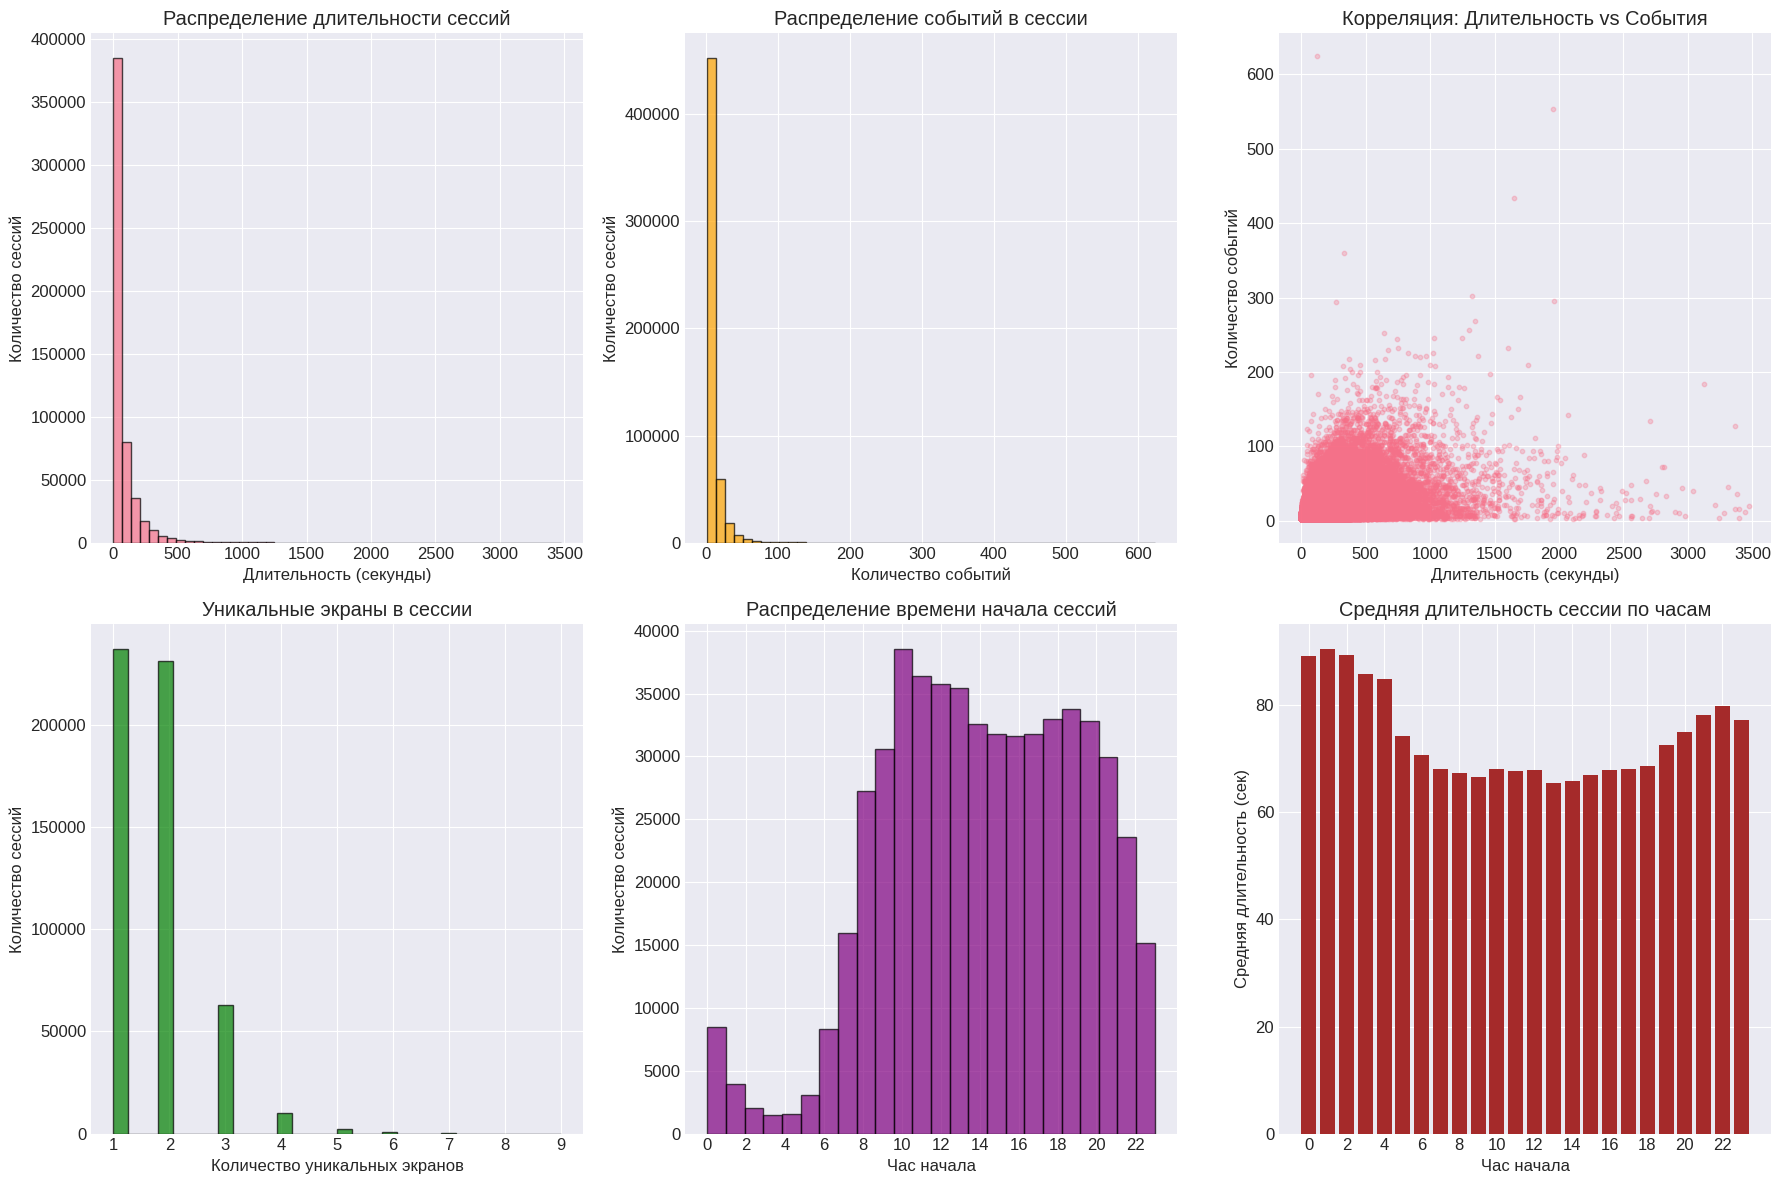


Статистика сессий:
Средняя длительность сессии: 70.4 сек
Медианная длительность: 29.0 сек
Максимальная длительность: 3472.0 сек

Среднее событий в сессии: 9.9
Медианное событий: 6.0

Среднее уникальных экранов: 1.7
Медианное уникальных экранов: 2.0

Короткие сессии (<60 сек): 363,672 (66.7%)
Длинные сессии (>5 мин): 22,142 (4.1%)


In [26]:

print("АНАЛИЗ СЕССИЙ")

sessions = df.groupby(['device_id', 'session_id']).agg({
    'timestamp': ['min', 'max', 'count'],
    'screen': ['nunique', lambda x: list(x)],
    'functionality': ['nunique', lambda x: list(x)],
    'hour': ['min', 'max']
}).reset_index()

sessions.columns = ['device_id', 'session_id', 'start_time', 'end_time',
                    'events_count', 'unique_screens', 'screen_sequence',
                    'unique_functions', 'function_sequence',
                    'start_hour', 'end_hour']

sessions['duration_seconds'] = (sessions['end_time'] - sessions['start_time']).dt.total_seconds()
sessions['session_date'] = sessions['start_time'].dt.date

# Фильтруем слишком короткие/длинные сессии (возможно ошибочные данные)
sessions_clean = sessions[
    (sessions['duration_seconds'] > 0) &
    (sessions['duration_seconds'] < 3600) &  # меньше 1 часа
    (sessions['events_count'] > 1)  # минимум 2 события
]

print(f"Всего сессий: {len(sessions):,}")
print(f"Сессий после очистки: {len(sessions_clean):,}")
print(f"Процент отфильтрованных: {(len(sessions)-len(sessions_clean))/len(sessions)*100:.1f}%")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#  Распределение длительности сессий
axes[0, 0].hist(sessions_clean['duration_seconds'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение длительности сессий')
axes[0, 0].set_xlabel('Длительность (секунды)')
axes[0, 0].set_ylabel('Количество сессий')

# Распределение количества событий в сессии
axes[0, 1].hist(sessions_clean['events_count'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Распределение событий в сессии')
axes[0, 1].set_xlabel('Количество событий')
axes[0, 1].set_ylabel('Количество сессий')

#  Корреляция длительности и событий
axes[0, 2].scatter(sessions_clean['duration_seconds'], sessions_clean['events_count'],
                   alpha=0.3, s=10)
axes[0, 2].set_title('Корреляция: Длительность vs События')
axes[0, 2].set_xlabel('Длительность (секунды)')
axes[0, 2].set_ylabel('Количество событий')

# Распределение уникальных экранов в сессии
axes[1, 0].hist(sessions_clean['unique_screens'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_title('Уникальные экраны в сессии')
axes[1, 0].set_xlabel('Количество уникальных экранов')
axes[1, 0].set_ylabel('Количество сессий')

# Время начала сессий
axes[1, 1].hist(sessions_clean['start_hour'], bins=24, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Распределение времени начала сессий')
axes[1, 1].set_xlabel('Час начала')
axes[1, 1].set_ylabel('Количество сессий')
axes[1, 1].set_xticks(range(0, 24, 2))

#  Средняя длительность сессии по часам
hourly_duration = sessions_clean.groupby('start_hour')['duration_seconds'].mean()
axes[1, 2].bar(hourly_duration.index, hourly_duration.values, color='brown')
axes[1, 2].set_title('Средняя длительность сессии по часам')
axes[1, 2].set_xlabel('Час начала')
axes[1, 2].set_ylabel('Средняя длительность (сек)')
axes[1, 2].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

print("\nСтатистика сессий:")
print(f"Средняя длительность сессии: {sessions_clean['duration_seconds'].mean():.1f} сек")
print(f"Медианная длительность: {sessions_clean['duration_seconds'].median():.1f} сек")
print(f"Максимальная длительность: {sessions_clean['duration_seconds'].max():.1f} сек")
print(f"\nСреднее событий в сессии: {sessions_clean['events_count'].mean():.1f}")
print(f"Медианное событий: {sessions_clean['events_count'].median():.1f}")
print(f"\nСреднее уникальных экранов: {sessions_clean['unique_screens'].mean():.1f}")
print(f"Медианное уникальных экранов: {sessions_clean['unique_screens'].median():.1f}")

# Анализ "коротких" vs "длинных" сессий
short_sessions = sessions_clean[sessions_clean['duration_seconds'] < 60]
long_sessions = sessions_clean[sessions_clean['duration_seconds'] > 300]

print(f"\nКороткие сессии (<60 сек): {len(short_sessions):,} ({len(short_sessions)/len(sessions_clean)*100:.1f}%)")
print(f"Длинные сессии (>5 мин): {len(long_sessions):,} ({len(long_sessions)/len(sessions_clean)*100:.1f}%)")

АНАЛИЗ ПОВЕДЕНИЯ ПОЛЬЗОВАТЕЛЕЙ

Всего уникальных пользователей: 179,976

Статистика по полу:
        count  avg_events  avg_sessions  avg_lifetime
gender                                               
Ж       98194        35.1           5.8          17.5
М       80213        33.3           5.3          17.1

Статистика по возрастным группам:
           device_id  total_events  num_sessions  lifetime_days
age_group                                                      
<18              233          15.3           4.2           10.2
18-25           5902          25.8           5.6           14.5
26-35          31369          30.1           5.8           17.0
36-45          63054          34.6           5.6           17.3
46-55          42576          36.1           5.5           17.6
56-65          23287          36.7           5.5           18.2
65+            12383          36.8           5.4           16.9


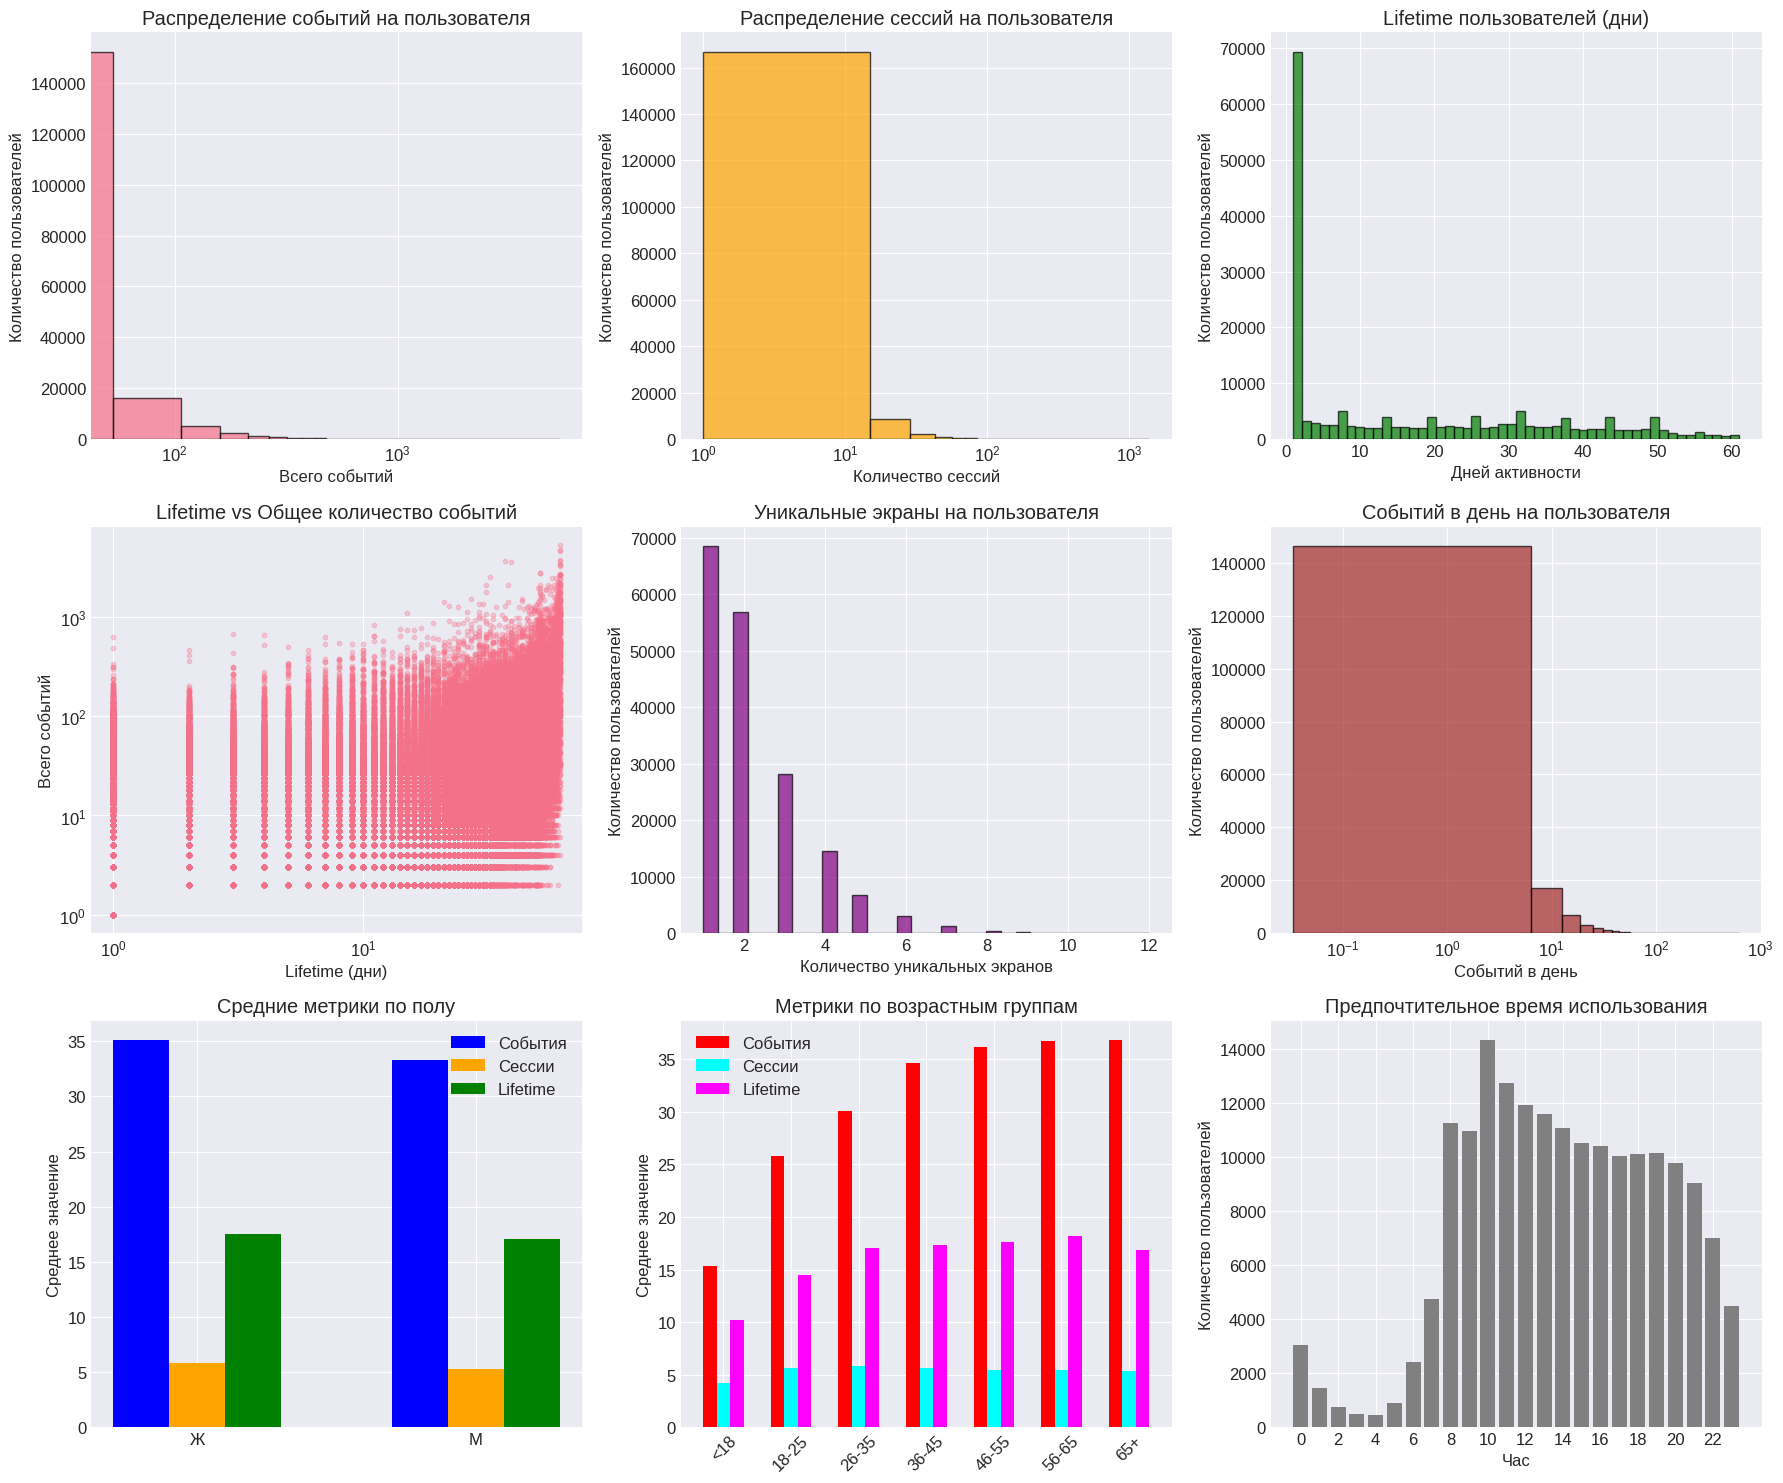


Детальная статистика по пользователям:
Среднее событий на пользователя: 34.3
Медиана событий: 12.0
90-й перцентиль: 76.0
99-й перцентиль: 334.0

Среднее сессий на пользователя: 5.6
Медиана сессий: 3.0

Средний lifetime (дни): 17.2
Медианный lifetime: 10.0


In [27]:

print("АНАЛИЗ ПОВЕДЕНИЯ ПОЛЬЗОВАТЕЛЕЙ")

user_profiles = df.groupby('device_id').agg({
    'session_id': 'nunique',
    'timestamp': ['count', 'min', 'max'],
    'screen': 'nunique',
    'functionality': 'nunique',
    'action': lambda x: x.notna().sum(),
    'hour': ['nunique', lambda x: x.mode()[0] if len(x.mode()) > 0 else None],
    'day_of_week': 'nunique',
    'manufacturer': 'first',
    'model': 'first',
    'device_type': 'first',
    'os': 'first'
}).reset_index()

user_profiles.columns = ['device_id', 'num_sessions', 'total_events',
                         'first_seen', 'last_seen', 'unique_screens',
                         'unique_functions', 'num_actions', 'active_hours',
                         'preferred_hour', 'active_days', 'manufacturer',
                         'model', 'device_type', 'os']


user_profiles = user_profiles.merge(dict_df, on='device_id', how='left')

user_profiles['lifetime_days'] = (user_profiles['last_seen'] - user_profiles['first_seen']).dt.days + 1
user_profiles['events_per_session'] = user_profiles['total_events'] / user_profiles['num_sessions']
user_profiles['events_per_day'] = user_profiles['total_events'] / user_profiles['lifetime_days'].clip(lower=1)
user_profiles['sessions_per_day'] = user_profiles['num_sessions'] / user_profiles['lifetime_days'].clip(lower=1)

print(f"\nВсего уникальных пользователей: {len(user_profiles):,}")

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

#  Распределение общего количества событий на пользователя
axes[0, 0].hist(user_profiles['total_events'], bins=100, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Распределение событий на пользователя')
axes[0, 0].set_xlabel('Всего событий')
axes[0, 0].set_ylabel('Количество пользователей')
axes[0, 0].set_xscale('log')

#  Распределение количества сессий
axes[0, 1].hist(user_profiles['num_sessions'], bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Распределение сессий на пользователя')
axes[0, 1].set_xlabel('Количество сессий')
axes[0, 1].set_ylabel('Количество пользователей')
axes[0, 1].set_xscale('log')

#  Распределение lifetime
axes[0, 2].hist(user_profiles['lifetime_days'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 2].set_title('Lifetime пользователей (дни)')
axes[0, 2].set_xlabel('Дней активности')
axes[0, 2].set_ylabel('Количество пользователей')

#  Корреляция lifetime и событий
axes[1, 0].scatter(user_profiles['lifetime_days'], user_profiles['total_events'],
                   alpha=0.3, s=10)
axes[1, 0].set_title('Lifetime vs Общее количество событий')
axes[1, 0].set_xlabel('Lifetime (дни)')
axes[1, 0].set_ylabel('Всего событий')
axes[1, 0].set_xscale('log')
axes[1, 0].set_yscale('log')

#  Распределение уникальных экранов на пользователя
axes[1, 1].hist(user_profiles['unique_screens'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].set_title('Уникальные экраны на пользователя')
axes[1, 1].set_xlabel('Количество уникальных экранов')
axes[1, 1].set_ylabel('Количество пользователей')

#  Распределение событий в день
axes[1, 2].hist(user_profiles['events_per_day'], bins=100, edgecolor='black', alpha=0.7, color='brown')
axes[1, 2].set_title('Событий в день на пользователя')
axes[1, 2].set_xlabel('Событий в день')
axes[1, 2].set_ylabel('Количество пользователей')
axes[1, 2].set_xscale('log')

# Анализ по полу
if 'gender' in user_profiles.columns:
    gender_stats = user_profiles.groupby('gender').agg({
        'device_id': 'count',
        'total_events': 'mean',
        'num_sessions': 'mean',
        'lifetime_days': 'mean'
    }).round(1)

    gender_stats.columns = ['count', 'avg_events', 'avg_sessions', 'avg_lifetime']
    print("\nСтатистика по полу:")
    print(gender_stats)


    x = range(len(gender_stats))
    width = 0.2
    axes[2, 0].bar([i - width for i in x], gender_stats['avg_events'], width, label='События', color='blue')
    axes[2, 0].bar(x, gender_stats['avg_sessions'], width, label='Сессии', color='orange')
    axes[2, 0].bar([i + width for i in x], gender_stats['avg_lifetime'], width, label='Lifetime', color='green')
    axes[2, 0].set_xticks(x)
    axes[2, 0].set_xticklabels(gender_stats.index)
    axes[2, 0].set_title('Средние метрики по полу')
    axes[2, 0].set_ylabel('Среднее значение')
    axes[2, 0].legend()

# Анализ по возрасту
if 'age' in user_profiles.columns:

    user_profiles['age_group'] = pd.cut(user_profiles['age'],
                                       bins=[0, 18, 25, 35, 45, 55, 65, 100],
                                       labels=['<18', '18-25', '26-35', '36-45',
                                               '46-55', '56-65', '65+'])

    age_stats = user_profiles.groupby('age_group').agg({
        'device_id': 'count',
        'total_events': 'mean',
        'num_sessions': 'mean',
        'lifetime_days': 'mean'
    }).round(1)

    print("\nСтатистика по возрастным группам:")
    print(age_stats)


    x = range(len(age_stats))
    width = 0.2
    axes[2, 1].bar([i - width for i in x], age_stats['total_events'], width, label='События', color='red')
    axes[2, 1].bar(x, age_stats['num_sessions'], width, label='Сессии', color='cyan')
    axes[2, 1].bar([i + width for i in x], age_stats['lifetime_days'], width, label='Lifetime', color='magenta')
    axes[2, 1].set_xticks(x)
    axes[2, 1].set_xticklabels(age_stats.index, rotation=45)
    axes[2, 1].set_title('Метрики по возрастным группам')
    axes[2, 1].set_ylabel('Среднее значение')
    axes[2, 1].legend()

# Распределение по предпочтительному времени использования
if 'preferred_hour' in user_profiles.columns:
    preferred_time = user_profiles['preferred_hour'].dropna().value_counts().sort_index()
    axes[2, 2].bar(preferred_time.index, preferred_time.values, color='gray')
    axes[2, 2].set_title('Предпочтительное время использования')
    axes[2, 2].set_xlabel('Час')
    axes[2, 2].set_ylabel('Количество пользователей')
    axes[2, 2].set_xticks(range(0, 24, 2))

plt.tight_layout()
plt.show()

# Детальная статистика по пользователям
print("\nДетальная статистика по пользователям:")
print(f"Среднее событий на пользователя: {user_profiles['total_events'].mean():.1f}")
print(f"Медиана событий: {user_profiles['total_events'].median():.1f}")
print(f"90-й перцентиль: {user_profiles['total_events'].quantile(0.9):.1f}")
print(f"99-й перцентиль: {user_profiles['total_events'].quantile(0.99):.1f}")

print(f"\nСреднее сессий на пользователя: {user_profiles['num_sessions'].mean():.1f}")
print(f"Медиана сессий: {user_profiles['num_sessions'].median():.1f}")

print(f"\nСредний lifetime (дни): {user_profiles['lifetime_days'].mean():.1f}")
print(f"Медианный lifetime: {user_profiles['lifetime_days'].median():.1f}")

АНАЛИЗ ВЫБРОСОВ И АНОМАЛИЙ


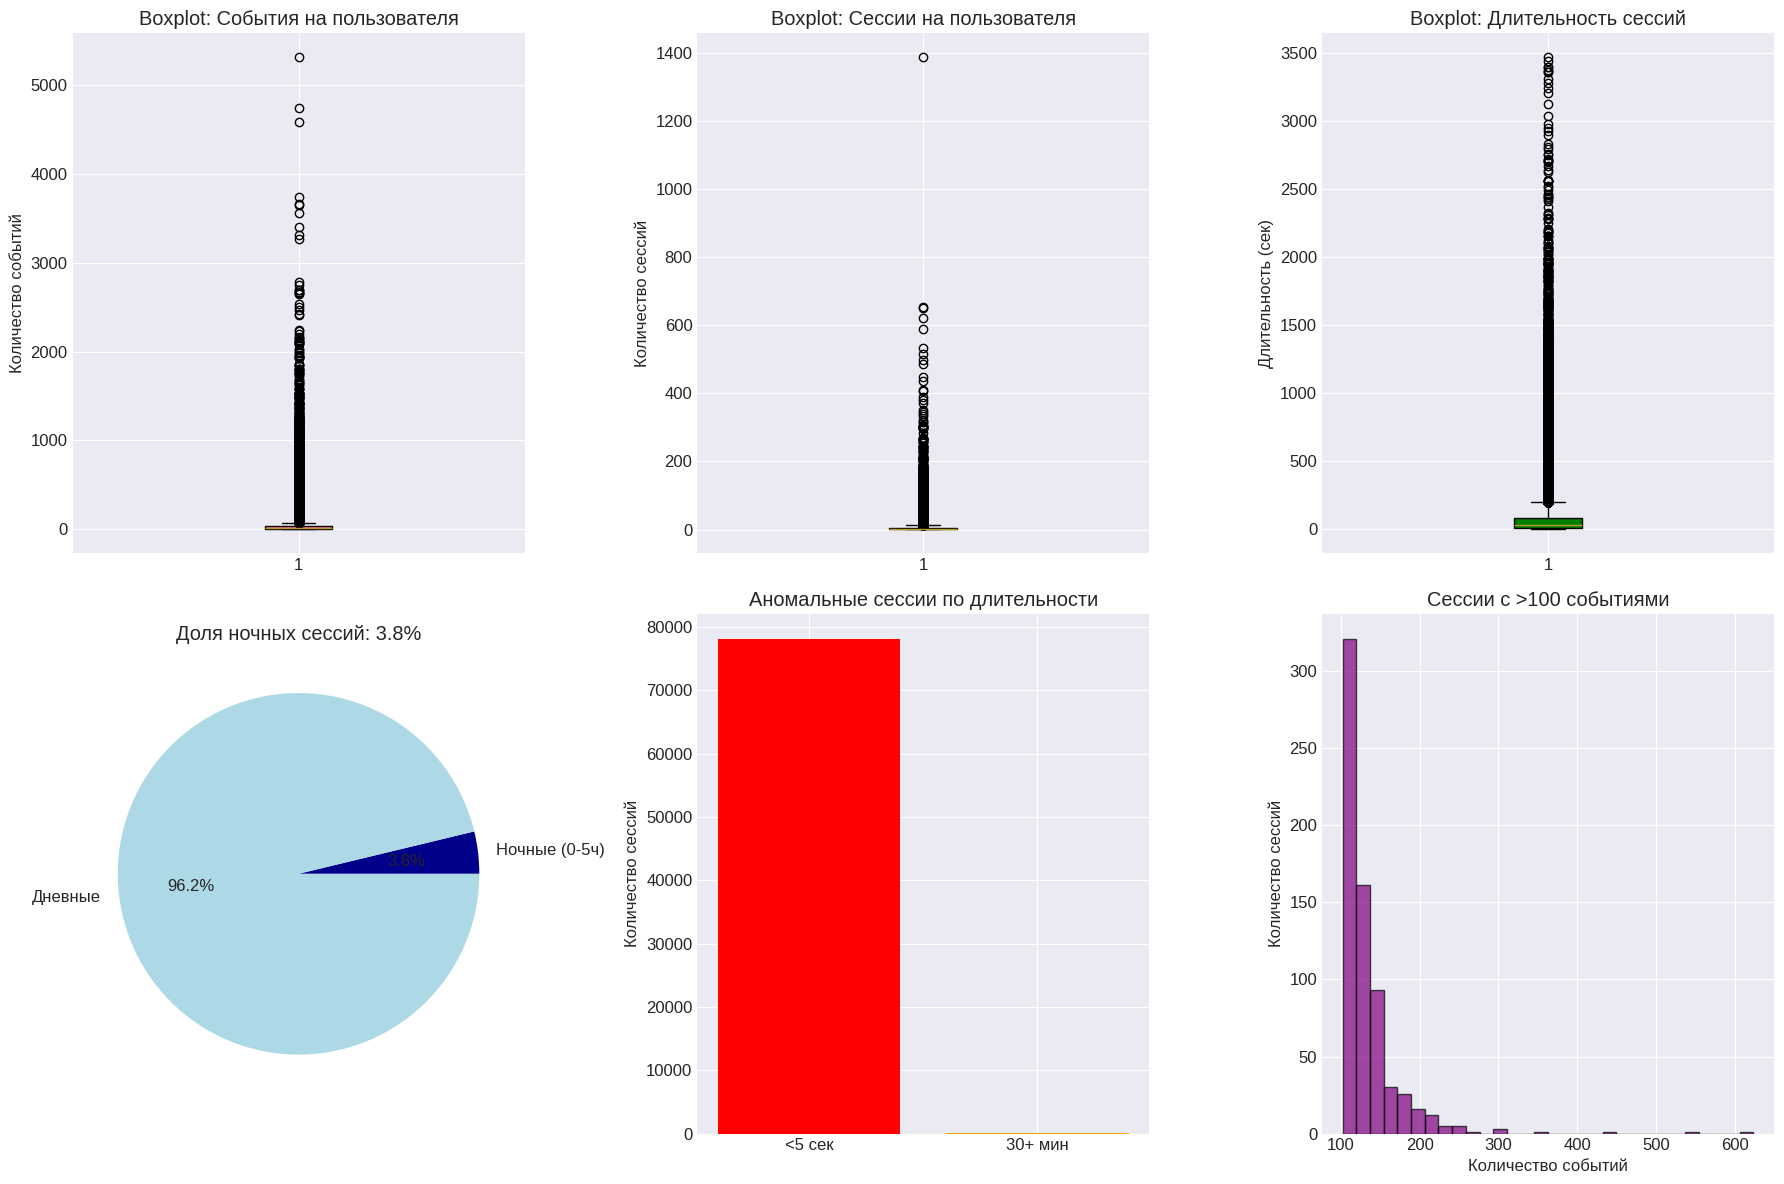


Анализ аномалий:
Ночные сессии (0-5 утра): 20,529 (3.8%)
Очень короткие сессии (<5 сек): 78,144 (14.3%)
Очень длинные сессии (>30 мин): 122 (0.0%)
Сессии с >100 событиями: 677 (0.1%)

Супер-пользователи (топ 1% по активности):
Количество: 1,789
Минимальное событий для попадания в топ: 334
Среднее событий у супер-пользователей: 643
Максимум событий: 5316


In [28]:

print("АНАЛИЗ ВЫБРОСОВ И АНОМАЛИЙ")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

#   события на пользователя
axes[0, 0].boxplot(user_profiles['total_events'], vert=True, patch_artist=True)
axes[0, 0].set_title('Boxplot: События на пользователя')
axes[0, 0].set_ylabel('Количество событий')

#   сессии на пользователя
axes[0, 1].boxplot(user_profiles['num_sessions'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='orange'))
axes[0, 1].set_title('Boxplot: Сессии на пользователя')
axes[0, 1].set_ylabel('Количество сессий')

#   длительность сессий
axes[0, 2].boxplot(sessions_clean['duration_seconds'], vert=True, patch_artist=True,
                   boxprops=dict(facecolor='green'))
axes[0, 2].set_title('Boxplot: Длительность сессий')
axes[0, 2].set_ylabel('Длительность (сек)')

#  Аномалии по времени суток (сессии в ночное время)
night_sessions = sessions_clean[(sessions_clean['start_hour'] >= 0) &
                                (sessions_clean['start_hour'] <= 5)]
night_ratio = len(night_sessions) / len(sessions_clean) * 100

axes[1, 0].pie([night_ratio, 100-night_ratio],
               labels=['Ночные (0-5ч)', 'Дневные'],
               autopct='%1.1f%%', colors=['darkblue', 'lightblue'])
axes[1, 0].set_title(f'Доля ночных сессий: {night_ratio:.1f}%')

#  Аномалии по длительности сессий
very_long_sessions = sessions_clean[sessions_clean['duration_seconds'] > 1800]  # >30 мин
very_short_sessions = sessions_clean[sessions_clean['duration_seconds'] < 5]    # <5 сек

axes[1, 1].bar(['<5 сек', '30+ мин'],
               [len(very_short_sessions), len(very_long_sessions)],
               color=['red', 'orange'])
axes[1, 1].set_title('Аномальные сессии по длительности')
axes[1, 1].set_ylabel('Количество сессий')

#  Аномалии по количеству событий в сессии
high_event_sessions = sessions_clean[sessions_clean['events_count'] > 100]
axes[1, 2].hist(high_event_sessions['events_count'], bins=30,
                edgecolor='black', alpha=0.7, color='purple')
axes[1, 2].set_title('Сессии с >100 событиями')
axes[1, 2].set_xlabel('Количество событий')
axes[1, 2].set_ylabel('Количество сессий')

plt.tight_layout()
plt.show()

print("\nАнализ аномалий:")
print(f"Ночные сессии (0-5 утра): {len(night_sessions):,} ({night_ratio:.1f}%)")
print(f"Очень короткие сессии (<5 сек): {len(very_short_sessions):,} ({len(very_short_sessions)/len(sessions_clean)*100:.1f}%)")
print(f"Очень длинные сессии (>30 мин): {len(very_long_sessions):,} ({len(very_long_sessions)/len(sessions_clean)*100:.1f}%)")
print(f"Сессии с >100 событиями: {len(high_event_sessions):,} ({len(high_event_sessions)/len(sessions_clean)*100:.1f}%)")

# Анализ пользователей-выбросов
top_1_percent = user_profiles['total_events'].quantile(0.99)
super_users = user_profiles[user_profiles['total_events'] > top_1_percent]

print(f"\nСупер-пользователи (топ 1% по активности):")
print(f"Количество: {len(super_users):,}")
print(f"Минимальное событий для попадания в топ: {top_1_percent:.0f}")
print(f"Среднее событий у супер-пользователей: {super_users['total_events'].mean():.0f}")
print(f"Максимум событий: {super_users['total_events'].max():.0f}")

КОРРЕЛЯЦИОННЫЙ АНАЛИЗ


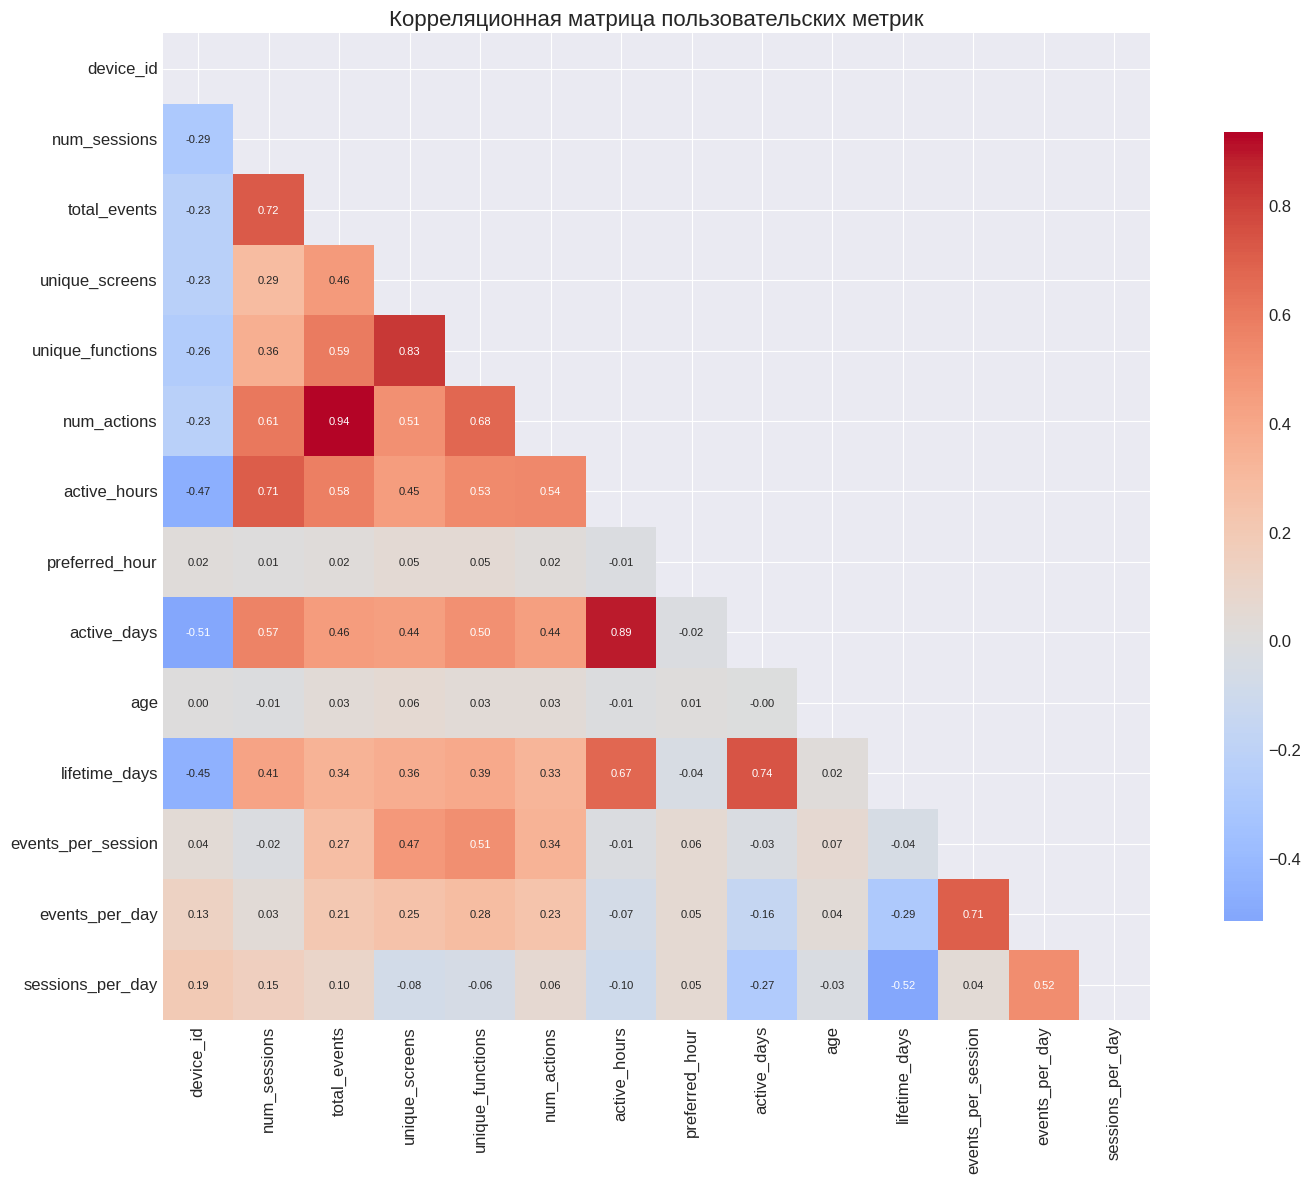


Самые сильные корреляции (|r| > 0.5):
  total_events ↔ num_actions: 0.935
  active_hours ↔ active_days: 0.891
  unique_screens ↔ unique_functions: 0.828
  active_days ↔ lifetime_days: 0.737
  num_sessions ↔ total_events: 0.719
  num_sessions ↔ active_hours: 0.713
  events_per_session ↔ events_per_day: 0.706
  unique_functions ↔ num_actions: 0.675
  active_hours ↔ lifetime_days: 0.671
  num_sessions ↔ num_actions: 0.607

Корреляции с возрастом:

Статистически значимые различия по полу (t-тест):
  num_sessions: t=-10.36, p=0.0000
    М: 5.27, Ж: 5.84
  total_events: t=-4.33, p=0.0000
    М: 33.34, Ж: 35.11
  unique_screens: t=3.33, p=0.0009
    М: 2.19, Ж: 2.17
  unique_functions: t=-7.05, p=0.0000
    М: 4.04, Ж: 4.17
  num_actions: t=-7.09, p=0.0000
    М: 16.07, Ж: 17.35
  active_hours: t=-17.27, p=0.0000
    М: 3.42, Ж: 3.69
  preferred_hour: t=-5.80, p=0.0000
    М: 13.79, Ж: 13.93
  active_days: t=-15.53, p=0.0000
    М: 2.53, Ж: 2.66
  lifetime_days: t=-4.10, p=0.0000
    М: 17.1

In [29]:

print("КОРРЕЛЯЦИОННЫЙ АНАЛИЗ")



correlation_data = user_profiles.select_dtypes(include=[np.number])


correlation_data = correlation_data.loc[:, correlation_data.std() > 0.1]


corr_matrix = correlation_data.corr()


plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True,
            cbar_kws={'shrink': 0.8}, annot_kws={'size': 8})
plt.title('Корреляционная матрица пользовательских метрик', fontsize=16)
plt.tight_layout()
plt.show()

print("\nСамые сильные корреляции (|r| > 0.5):")
strong_correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            strong_correlations.append((
                corr_matrix.columns[i],
                corr_matrix.columns[j],
                corr_value
            ))

strong_correlations.sort(key=lambda x: abs(x[2]), reverse=True)
for feature1, feature2, corr_value in strong_correlations[:10]:
    print(f"  {feature1} ↔ {feature2}: {corr_value:.3f}")


if 'age' in correlation_data.columns and 'gender' in user_profiles.columns:
    print("\nКорреляции с возрастом:")
    age_correlations = corr_matrix['age'].sort_values(key=abs, ascending=False)
    for feature, corr_value in age_correlations.items():
        if feature != 'age' and abs(corr_value) > 0.1:
            print(f"  {feature}: {corr_value:.3f}")

    print("\nСтатистически значимые различия по полу (t-тест):")
    if user_profiles['gender'].notna().sum() > 100:
        numeric_cols = user_profiles.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if col not in ['device_id']:
                male_data = user_profiles[user_profiles['gender'] == 'М'][col].dropna()
                female_data = user_profiles[user_profiles['gender'] == 'Ж'][col].dropna()

                if len(male_data) > 30 and len(female_data) > 30:
                    from scipy.stats import ttest_ind
                    t_stat, p_value = ttest_ind(male_data, female_data, equal_var=False)
                    if p_value < 0.05 and abs(t_stat) > 2:
                        print(f"  {col}: t={t_stat:.2f}, p={p_value:.4f}")
                        print(f"    М: {male_data.mean():.2f}, Ж: {female_data.mean():.2f}")

АНАЛИЗ ПОВЕДЕНЧЕСКИХ ПАТТЕРНОВ


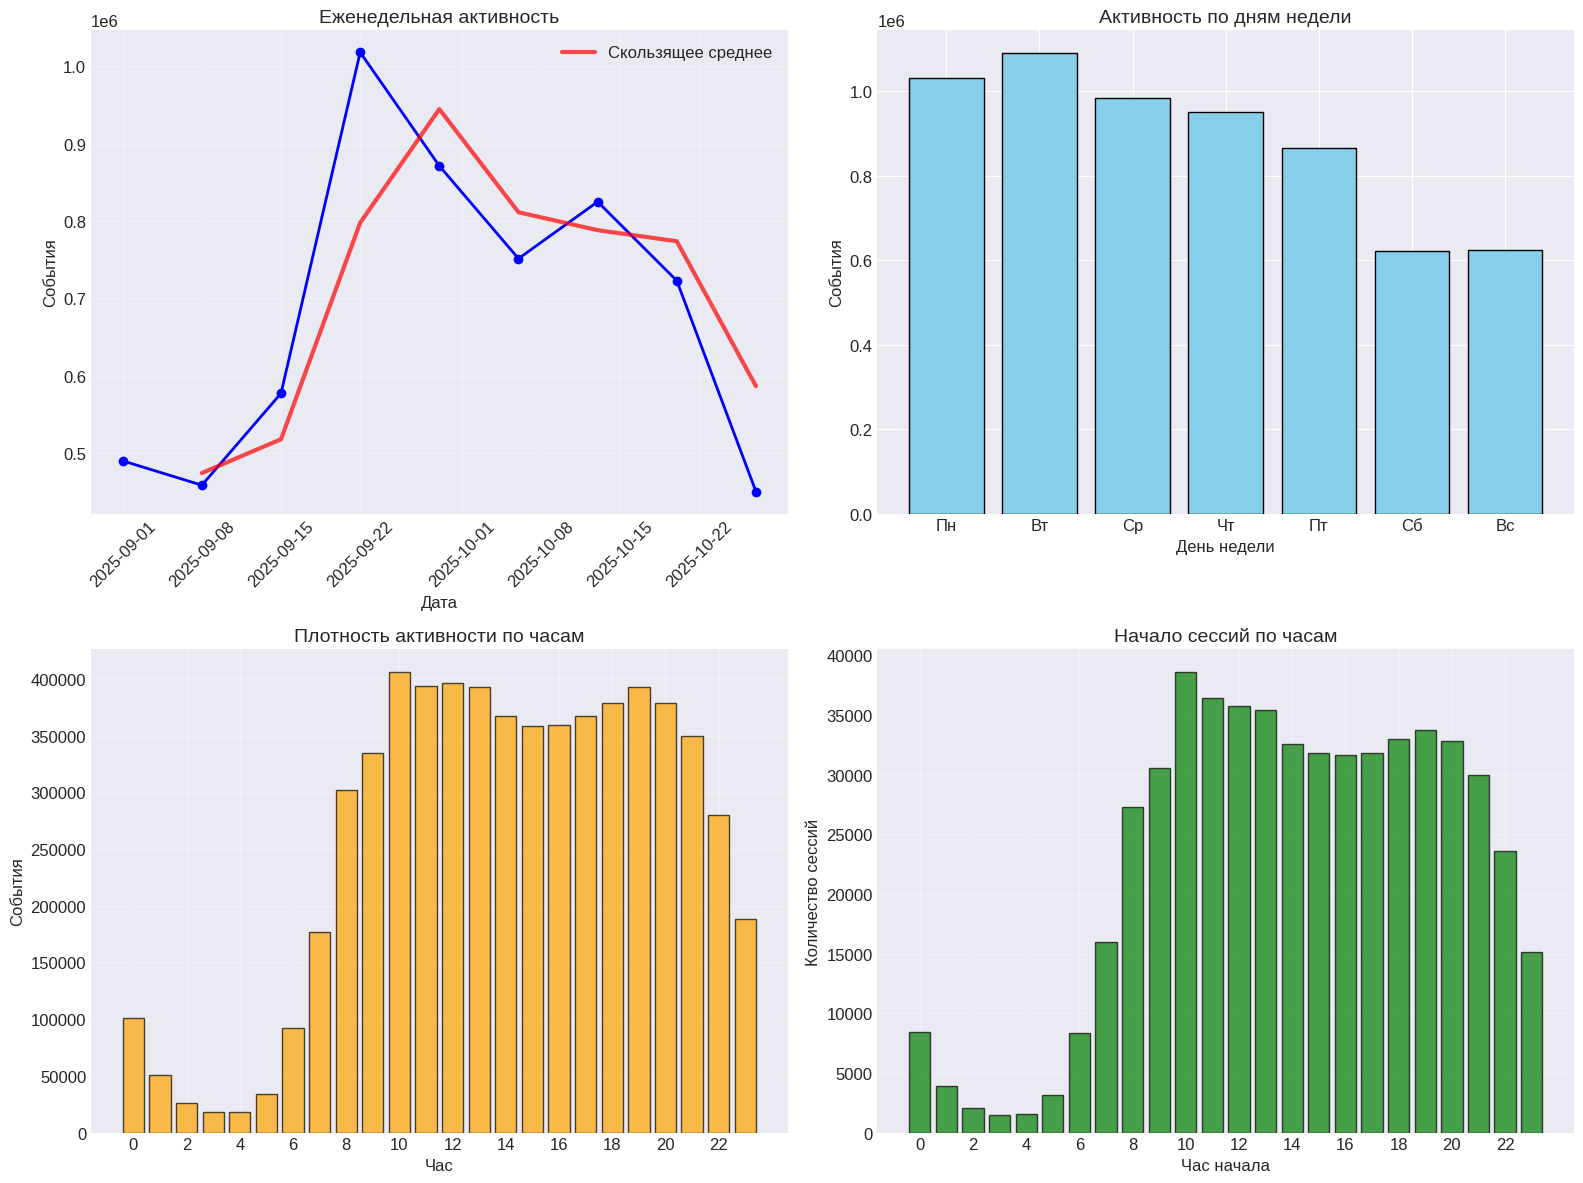


АНАЛИЗ ПОСЛЕДОВАТЕЛЬНОСТЕЙ ДЕЙСТВИЙ:
Создаем анализ последовательностей...
✓ Проанализировано 100 пользователей
✓ Создано 209,636 последовательностей

Статистика последовательностей:
• Всего последовательностей: 209,636
• Уникальных паттернов: 1,530
• Топ-10 последовательностей покрывают: 67.4% всех действий

Топ-5 самых частых последовательностей:
1. Открытие экрана → Открытие экрана → Открытие экрана: 70,255 (33.5%)
2. Открытие экрана → Открытие экрана → Переход в раздел 'Заявки': 15,472 (7.4%)
3. Переход в раздел 'Заявки' → Открытие экрана → Открытие экрана: 13,132 (6.3%)
4. Открытие экрана → Переход в раздел 'Заявки' → Переход в раздел 'Заявки': 10,246 (4.9%)
5. Переход в раздел 'Заявки' → Переход в раздел 'Заявки' → Открытие экрана: 9,470 (4.5%)
ПРОБЛЕМНЫЕ МОМЕНТЫ:

1. Дублирование действий:
   • Найдено дублирующихся последовательностей: 36.4%
   → Возможно, пользователи несколько раз нажимают на одно и то же

2. Конверсия в ключевые действия:
   • Ключевые действия: 1,223,263 и

In [31]:
print("АНАЛИЗ ПОВЕДЕНЧЕСКИХ ПАТТЕРНОВ")


weekly_trend = df.groupby(['year', 'week_number']).size().reset_index(name='events')
weekly_trend['week_number'] = weekly_trend['week_number'].astype(int)
weekly_trend['year'] = weekly_trend['year'].astype(int)


weekly_trend['date'] = weekly_trend.apply(
    lambda row: pd.to_datetime(f"{row['year']}-W{row['week_number']:02d}-1", format='%G-W%V-%u'),
    axis=1
)


fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#  Тренд активности
axes[0, 0].plot(weekly_trend['date'], weekly_trend['events'], marker='o', linewidth=2, color='blue')
axes[0, 0].set_title('Еженедельная активность', fontsize=14)
axes[0, 0].set_xlabel('Дата')
axes[0, 0].set_ylabel('События')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Скользящее среднее
weekly_trend['ma_4'] = weekly_trend['events'].rolling(window=2).mean()
axes[0, 0].plot(weekly_trend['date'], weekly_trend['ma_4'], linewidth=3, color='red', alpha=0.7, label='Скользящее среднее')
axes[0, 0].legend()

# Анализ паттернов по дням недели
weekday_activity = df.groupby('day_of_week').size()
weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
axes[0, 1].bar(range(7), weekday_activity.values, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Активность по дням недели', fontsize=14)
axes[0, 1].set_xlabel('День недели')
axes[0, 1].set_ylabel('События')
axes[0, 1].set_xticks(range(7))
axes[0, 1].set_xticklabels(weekday_names)

#  Плотность активности по часам
hourly_density = df.groupby('hour').size()
axes[1, 0].bar(hourly_density.index, hourly_density.values, color='orange', edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Плотность активности по часам', fontsize=14)
axes[1, 0].set_xlabel('Час')
axes[1, 0].set_ylabel('События')
axes[1, 0].set_xticks(range(0, 24, 2))
axes[1, 0].grid(True, alpha=0.3)

if 'sessions_clean' not in locals():
    print("Создаем данные сессий...")

    sessions = df.groupby(['device_id', 'session_id']).agg({
        'timestamp': ['min', 'max', 'count'],
        'screen': 'nunique'
    }).reset_index()

    sessions.columns = ['device_id', 'session_id', 'start_time', 'end_time',
                        'events_count', 'unique_screens']

    sessions['duration_seconds'] = (sessions['end_time'] - sessions['start_time']).dt.total_seconds()
    sessions['start_hour'] = sessions['start_time'].dt.hour


    sessions_clean = sessions[
        (sessions['duration_seconds'] > 0) &
        (sessions['duration_seconds'] < 3600) &
        (sessions['events_count'] > 1)
    ]

if 'sessions_clean' in locals():
    session_hour_counts = sessions_clean['start_hour'].value_counts().sort_index()
    axes[1, 1].bar(session_hour_counts.index, session_hour_counts.values, color='green', edgecolor='black', alpha=0.7)
    axes[1, 1].set_title('Начало сессий по часам', fontsize=14)
    axes[1, 1].set_xlabel('Час начала')
    axes[1, 1].set_ylabel('Количество сессий')
    axes[1, 1].set_xticks(range(0, 24, 2))
    axes[1, 1].grid(True, alpha=0.3)
else:
    axes[1, 1].axis('off')
    axes[1, 1].text(0.5, 0.5, 'Данные сессий недоступны',
                   ha='center', va='center', fontsize=12)

plt.tight_layout()
plt.show()


print("\nАНАЛИЗ ПОСЛЕДОВАТЕЛЬНОСТЕЙ ДЕЙСТВИЙ:")


if 'all_sequences' not in locals() or 'sequence_counter' not in locals():
    print("Создаем анализ последовательностей...")

    from collections import Counter

    all_sequences = []

    # Анализируем только топ-100 пользователей по активности для производительности
    top_users = df.groupby('device_id').size().nlargest(100).index

    for device_id in top_users:
        user_data = df[df['device_id'] == device_id].sort_values('timestamp')

        # Создаем последовательности из 3 действий
        actions = user_data['functionality'].tolist()
        if len(actions) >= 3:
            for i in range(len(actions) - 2):
                sequence = tuple(actions[i:i+3])
                all_sequences.append(sequence)

    sequence_counter = Counter(all_sequences)

    print(f"Проанализировано {len(top_users)} пользователей")
    print(f"Создано {len(all_sequences):,} последовательностей")

print(f"\nСтатистика последовательностей:")
print(f"• Всего последовательностей: {len(all_sequences):,}")
print(f"• Уникальных паттернов: {len(sequence_counter):,}")

if len(all_sequences) > 0:
    top_10_coverage = sum(count for _, count in sequence_counter.most_common(10)) / len(all_sequences) * 100
    print(f"• Топ-10 последовательностей покрывают: {top_10_coverage:.1f}% всех действий")

    # Показываем топ-5 последовательностей
    print(f"\nТоп-5 самых частых последовательностей:")
    for i, (seq, count) in enumerate(sequence_counter.most_common(5), 1):
        seq_str = " → ".join(seq)
        percentage = count / len(all_sequences) * 100
        print(f"{i}. {seq_str}: {count:,} ({percentage:.1f}%)")
else:
    print("• Нет данных о последовательностях")


print("ПРОБЛЕМНЫЕ МОМЕНТЫ:")

print("\n1. Дублирование действий:")
if 'all_sequences' in locals() and len(all_sequences) > 0:
    duplicate_actions = 0
    for seq in all_sequences:
        if len(set(seq)) == 1:
            duplicate_actions += 1

    if len(all_sequences) > 0:
        duplicate_percentage = duplicate_actions / len(all_sequences) * 100
        print(f"   • Найдено дублирующихся последовательностей: {duplicate_percentage:.1f}%")
        print("   → Возможно, пользователи несколько раз нажимают на одно и то же")

print("\n2. Конверсия в ключевые действия:")

key_actions = ['оплат', 'заявк', 'показан', 'голосован', 'уведомл']
key_action_count = 0
total_actions = len(df)

for action in key_actions:
    matching = df['functionality'].str.contains(action, case=False, na=False).sum()
    key_action_count += matching

if total_actions > 0:
    key_percentage = key_action_count / total_actions * 100
    print(f"   • Ключевые действия: {key_action_count:,} из {total_actions:,} ({key_percentage:.1f}%)")
    if key_percentage < 5:
        print("   → Низкая конверсия в целевые действия")
    else:
        print("   → Приемлемый уровень ключевых действий")

print("\n3. Навигация между разделами:")

if 'user_profiles' in locals():
    avg_unique_screens = user_profiles['unique_screens'].mean()
    print(f"   • Среднее уникальных экранов на пользователя: {avg_unique_screens:.1f}")
    if avg_unique_screens < 3:
        print("   → Пользователи исследуют мало разделов")
    else:
        print("   → Пользователи активно исследуют приложение")





In [32]:

print("АНАЛИЗ ПОСЛЕДОВАТЕЛЬНОСТЕЙ ДЕЙСТВИЙ")



print("\nТИПОЛОГИЯ ПОСЛЕДОВАТЕЛЬНОСТЕЙ:")

def categorize_sequence(sequence):
    seq_str = ' → '.join(sequence)

    if all(action == sequence[0] for action in sequence):
        return "Повторение одного действия"
    elif len(set(sequence)) == 1:
        return "Циклическое действие"
    elif 'Открытие экрана' in seq_str and 'Заявки' in seq_str:
        return "Работа с заявками"
    elif 'Уведомление' in seq_str:
        return "Работа с уведомлениями"
    elif 'Опросы' in seq_str:
        return "Участие в опросах"
    else:
        return "Другое"

sequence_categories = {}
for seq, count in sequence_counter.most_common(100):
    category = categorize_sequence(seq)
    sequence_categories[category] = sequence_categories.get(category, 0) + count

print("\nРаспределение по типам последовательностей (топ-100):")
total_top_100 = sum(sequence_categories.values())
for category, count in sorted(sequence_categories.items(), key=lambda x: x[1], reverse=True):
    percentage = count / total_top_100 * 100
    print(f"  {category}: {count:,} ({percentage:.1f}%)")


print("\nАНАЛИЗ ЭФФЕКТИВНОСТИ ПУТЕЙ:")

target_actions = ['Оплата', 'Создание заявки', 'Передача показаний', 'Голосование']


effective_sequences = []
for seq, count in sequence_counter.most_common(1000):
    if any(target in ' → '.join(seq) for target in target_actions):
        effective_sequences.append((seq, count))

print(f"\nНайдено эффективных последовательностей: {len(effective_sequences)}")

if effective_sequences:
    print("\nТоп-5 эффективных последовательностей:")
    for seq, count in effective_sequences[:5]:
        print(f"  {' → '.join(seq)}: {count:,}")
else:
    print("\nВ данных не обнаружено последовательностей, ведущих к ключевым действиям!")

АНАЛИЗ ПОСЛЕДОВАТЕЛЬНОСТЕЙ ДЕЙСТВИЙ

ТИПОЛОГИЯ ПОСЛЕДОВАТЕЛЬНОСТЕЙ:

Распределение по типам последовательностей (топ-100):
  Повторение одного действия: 75,518 (38.8%)
  Работа с заявками: 56,679 (29.1%)
  Другое: 49,484 (25.4%)
  Участие в опросах: 13,134 (6.7%)

АНАЛИЗ ЭФФЕКТИВНОСТИ ПУТЕЙ:

Найдено эффективных последовательностей: 0

В данных не обнаружено последовательностей, ведущих к ключевым действиям!


In [33]:

print("АНАЛИЗ ВОРОНКИ КОНВЕРСИИ")



key_actions_analysis = {}


action_keywords = {
    'оплат': ['оплат', 'платеж', 'payment', 'pay'],
    'заявк': ['заявк', 'request', 'application', 'тикет'],
    'показани': ['показани', 'счетчик', 'meter'],
    'голосовани': ['голосовани', 'опрос', 'vote', 'survey'],
    'уведомлени': ['уведомлени', 'notification', 'alert'],
    'ча': ['ча', 'chat', 'общен']
}

for keyword, variations in action_keywords.items():

    matching_functions = [func for func in df['functionality'].unique()
                         if any(var in func.lower() for var in variations)]

    if matching_functions:
        total_count = df[df['functionality'].isin(matching_functions)].shape[0]
        key_actions_analysis[keyword] = {
            'functions': matching_functions[:3],
            'count': total_count,
            'percentage': total_count / len(df) * 100
        }

print("\nКлючевые действия в данных:")
for action, data in key_actions_analysis.items():
    print(f"\n{action.upper()}:")
    print(f"  Функции: {', '.join(data['functions'])}")
    print(f"  Количество: {data['count']:,}")
    print(f"  Доля от всех действий: {data['percentage']:.2f}%")



funnel_stages_real = {
    'Открытие приложения': ['Открытие экрана'],
    'Использование сервиса': ["Переход в раздел 'Заявки'", "Переход в раздел 'Услуги'",
                              "Переход в раздел 'Опросы и собрания собственников'"],
    'Просмотр уведомлений': ['Просмотр уведомления'],
    'Выбор квартиры': ['Выбор квартиры'],
    'Работа с заявками': ['Тап на кнопку Заявки', 'Тап на квартиру']
}

funnel_counts = {}
cumulative_users = set()

for stage_name, stage_patterns in funnel_stages_real.items():

    stage_users = set()

    for pattern in stage_patterns:
        matching_actions = df[df['functionality'].str.contains(pattern, na=False)]['device_id'].unique()
        stage_users.update(matching_actions)

    funnel_counts[stage_name] = {
        'unique_users': len(stage_users),
        'new_users': len(stage_users - cumulative_users),
        'cumulative': len(cumulative_users.union(stage_users))
    }

    cumulative_users = cumulative_users.union(stage_users)


prev_count = None
for stage, data in funnel_counts.items():
    users = data['unique_users']
    percentage = users / funnel_counts['Открытие приложения']['unique_users'] * 100 if 'Открытие приложения' in funnel_counts else 0

    if prev_count is not None and prev_count > 0:
        dropoff = (prev_count - data['new_users']) / prev_count * 100
        print(f"  {stage}: {users:,} пользователей ({percentage:.1f}%) | Отток: {dropoff:.1f}%")
    else:
        print(f"  {stage}: {users:,} пользователей ({percentage:.1f}%)")

    prev_count = users

АНАЛИЗ ВОРОНКИ КОНВЕРСИИ

Ключевые действия в данных:

ОПЛАТ:
  Функции: Переход в раздел 'Мои платежи'
  Количество: 108,710
  Доля от всех действий: 1.73%

ЗАЯВК:
  Функции: Переход в раздел 'Заявки', Отправка заявки, Выбор объекта заявки
  Количество: 782,413
  Доля от всех действий: 12.48%

ГОЛОСОВАНИ:
  Функции: Переход в раздел 'Опросы и собрания собственников', Переход к определению даты начала и продолжительности голосования, Переход к созданию вопросов повестки
  Количество: 240,797
  Доля от всех действий: 3.84%

УВЕДОМЛЕНИ:
  Функции: Просмотр уведомления, Переход в раздел 'Настройки уведомлений'
  Количество: 440,284
  Доля от всех действий: 7.02%

ЧА:
  Функции: Переход к чату с соседями, Отправка сообщения автору объявления, Переход к определению даты начала и продолжительности голосования
  Количество: 4,843
  Доля от всех действий: 0.08%
  Открытие приложения: 169,034 пользователей (100.0%)
  Использование сервиса: 74,295 пользователей (44.0%) | Отток: 100.0%
  Просмотр

In [34]:

print("АНАЛИЗ USER JOURNEYS С ИСПОЛЬЗОВАНИЕМ МАРКОВСКИХ ЦЕПЕЙ")



all_functions = df['functionality'].unique()
function_to_idx = {func: idx for idx, func in enumerate(all_functions)}
idx_to_function = {idx: func for func, idx in function_to_idx.items()}


transition_matrix = np.zeros((len(all_functions), len(all_functions)))

for _, group in df.sort_values('timestamp').groupby(['device_id', 'session_id']):
    functions = group['functionality'].tolist()
    for i in range(len(functions) - 1):
        from_idx = function_to_idx[functions[i]]
        to_idx = function_to_idx[functions[i + 1]]
        transition_matrix[from_idx, to_idx] += 1


row_sums = transition_matrix.sum(axis=1, keepdims=True)
row_sums[row_sums == 0] = 1  # избегаем деления на 0
transition_probabilities = transition_matrix / row_sums

print("\nНаиболее вероятные переходы между функциями:")

# Находим топ-10 переходов с вероятностью > 0.1
high_prob_transitions = []
for i in range(len(all_functions)):
    for j in range(len(all_functions)):
        prob = transition_probabilities[i, j]
        if prob > 0.1 and i != j:
            high_prob_transitions.append((
                idx_to_function[i],
                idx_to_function[j],
                prob
            ))

# Сортируем по вероятности
high_prob_transitions.sort(key=lambda x: x[2], reverse=True)

print(f"\nВсего переходов с вероятностью >10%: {len(high_prob_transitions)}")
print("\nТоп-10 переходов между разными функциями:")
for from_func, to_func, prob in high_prob_transitions[:10]:
    print(f"  {from_func} → {to_func}: {prob:.1%}")


print("\nСТАЦИОНАРНОЕ РАСПРЕДЕЛЕНИЕ (наиболее частые функции):")


function_counts = df['functionality'].value_counts()
total_functions = len(df)

print(f"\nТоп-10 самых частых функций:")
for i, (func, count) in enumerate(function_counts.head(10).items(), 1):
    percentage = count / total_functions * 100
    print(f"  {i}. {func}: {count:,} ({percentage:.1f}%)")

АНАЛИЗ USER JOURNEYS С ИСПОЛЬЗОВАНИЕМ МАРКОВСКИХ ЦЕПЕЙ

Наиболее вероятные переходы между функциями:

Всего переходов с вероятностью >10%: 199

Топ-10 переходов между разными функциями:
  Удаление объявления → Открытие экрана: 57.5%
  Переход к добавлению адреса → Открытие экрана: 57.4%
  Переход в раздел 'Объявления' → Открытие экрана: 56.0%
  Переход в раздел 'Мои баллы' → Открытие экрана: 53.3%
  Переход к созданию заявки на подключение умного решения → Открытие экрана: 52.8%
  Переход к ознакомлению с документом в Базе знаний → Открытие экрана: 50.4%
  Переход к истории начисления баллов → Открытие экрана: 50.0%
  Переход в раздел 'Заявки' → Открытие экрана: 49.7%
  Переход к проверке баллов ЭД → Открытие экрана: 49.5%
  Подтверждение выполнения заявки → Открытие экрана: 49.2%

СТАЦИОНАРНОЕ РАСПРЕДЕЛЕНИЕ (наиболее частые функции):

Топ-10 самых частых функций:
  1. Открытие экрана: 3,241,298 (51.7%)
  2. Просмотр уведомления: 437,070 (7.0%)
  3. Переход в раздел 'Заявки': 362,620 (

In [35]:

try:

    reviews_df = pd.read_csv('отзывы.csv')  # если есть файл

    from sklearn.feature_extraction.text import TfidfVectorizer
    from sklearn.cluster import KMeans
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize


    nltk.download('stopwords')
    nltk.download('punkt')

    stop_words = set(stopwords.words('russian'))

    def preprocess_text(text):
        if not isinstance(text, str):
            return ""
        tokens = word_tokenize(text.lower())
        tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
        return " ".join(tokens)

    reviews_df['processed_text'] = reviews_df['text'].apply(preprocess_text)


    vectorizer = TfidfVectorizer(max_features=500)
    X_reviews = vectorizer.fit_transform(reviews_df['processed_text'])


    review_clusters = KMeans(n_clusters=5, random_state=42).fit_predict(X_reviews)
    reviews_df['topic_cluster'] = review_clusters


    print("\nАнализ тем в отзывах:")
    for cluster_id in range(5):
        cluster_reviews = reviews_df[reviews_df['topic_cluster'] == cluster_id]
        print(f"\nКластер {cluster_id} ({len(cluster_reviews)} отзывов):")

        vectorizer_cluster = TfidfVectorizer(max_features=10)
        X_cluster = vectorizer_cluster.fit_transform(cluster_reviews['processed_text'])
        feature_names = vectorizer_cluster.get_feature_names_out()
        print(f"Ключевые слова: {', '.join(feature_names)}")

except Exception as e:
    print(f"NLP анализ отзывов недоступен: {e}")

NLP анализ отзывов недоступен: [Errno 2] No such file or directory: 'отзывы.csv'


АНАЛИЗ УДЕРЖАНИЯ ПОЛЬЗОВАТЕЛЕЙ
Тип данных timestamp: datetime64[ns]

Примеры временных меток:
0   2025-09-29 10:20:27
1   2025-09-29 10:20:27
2   2025-09-29 10:21:56
Name: timestamp, dtype: datetime64[ns]

✓ timestamp уже в правильном формате datetime. Пропускаем преобразование.

Последняя дата в данных: 2025-10-31 23:59:54

Даты отсечки для анализа retention:
  • 7 дней назад: 2025-10-24 23:59:54
  • 14 дней назад: 2025-10-17 23:59:54
  • 30 дней назад: 2025-10-01 23:59:54

Очищено данных: 179602 из 179976 строк
Тип lifetime_days после очистки: float64

 ОБЩАЯ СТАТИСТИКА УДЕРЖАНИЯ:
  • Всего пользователей: 179,602
  • Retention 7 дней: 15.0% (26,894 пользователей)
  • Retention 14 дней: 35.4% (63,563 пользователей)
  • Retention 30 дней: 65.2% (117,047 пользователей)

РАСПРЕДЕЛЕНИЕ ВРЕМЕНИ СУЩЕСТВОВАНИЯ ПОЛЬЗОВАТЕЛЕЙ:
  • Среднее: 17.2 дней
  • Медиана: 10.0 дней
  • Минимум: 1.0 дней
  • Максимум: 61.0 дней
  • 25-й перцентиль: 1.0 дней
  • 75-й перцентиль: 31.0 дней


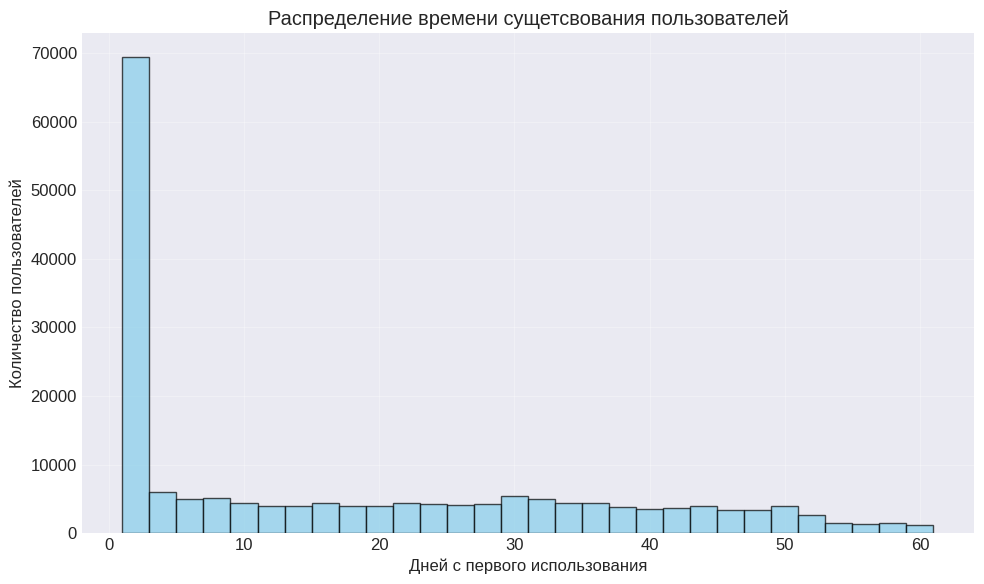

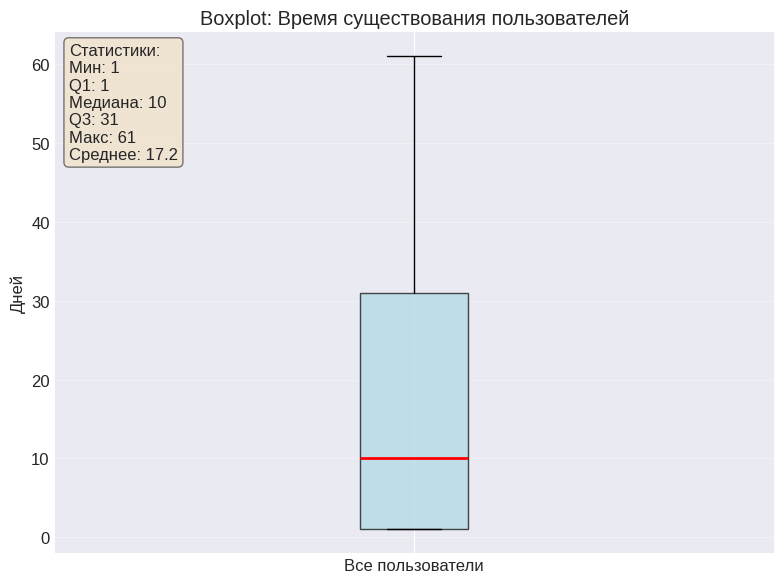

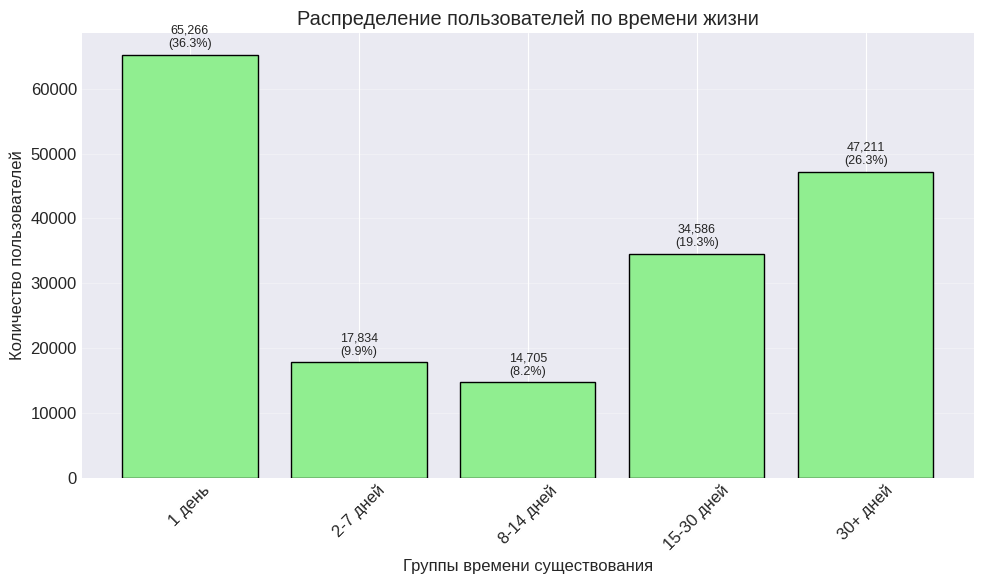

 АНАЛИЗ RETENTION ПО ДНЯМ

 Retention rate по дням от первого использования:
  День 0.0: 100.0% (179602.0 пользователей)
  День 1.0: 15.9% (28469.0 пользователей)
  День 2.0: 11.7% (21001.0 пользователей)
  День 3.0: 10.0% (18050.0 пользователей)
  День 4.0: 8.9% (15931.0 пользователей)
  День 5.0: 8.1% (14524.0 пользователей)
  День 6.0: 8.2% (14760.0 пользователей)
  День 7.0: 8.4% (15143.0 пользователей)


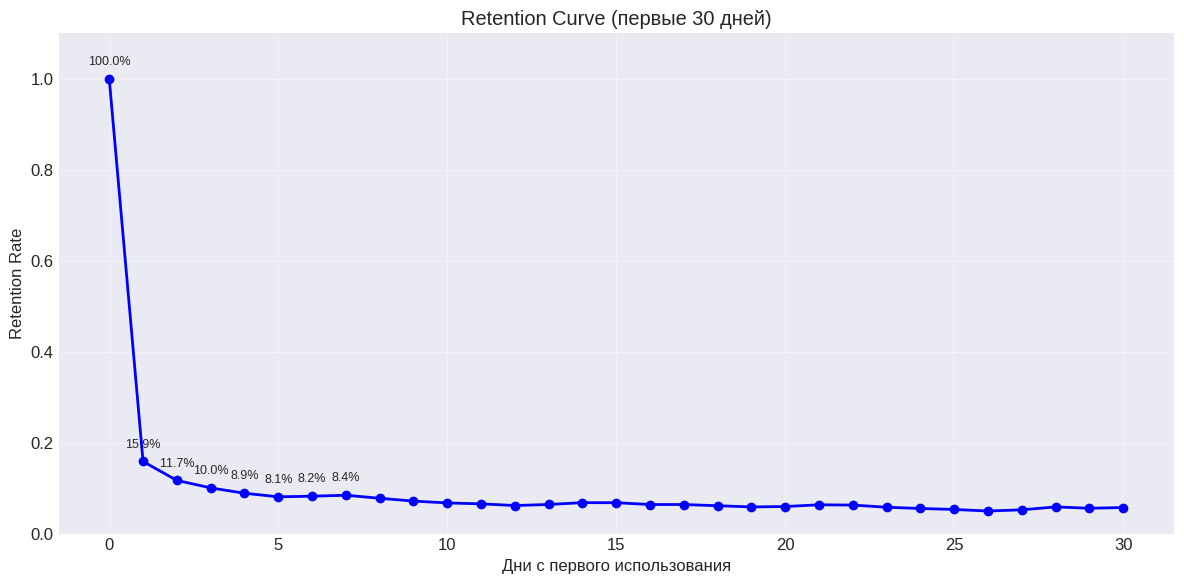

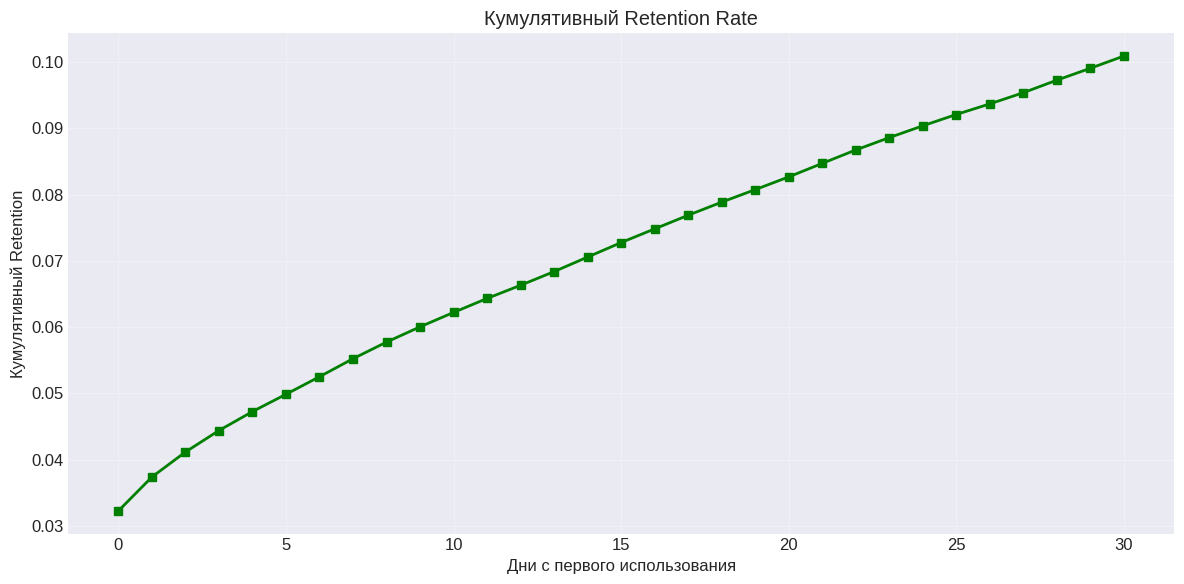


Распределение пользователей по времени существования:
  • Были 1 день: 36.3%
  • Были 2-7 дней: 9.9%
  • Были 8-30 дней: 27.4%
  • Были >30 дней: 26.3%

Активность по дням недели:
  • Tuesday: 1,089,099 событий
  • Monday: 1,031,332 событий
  • Wednesday: 983,163 событий
  • Thursday: 951,310 событий
  • Friday: 864,052 событий
  • Sunday: 623,576 событий
  • Saturday: 621,771 событий


In [36]:
print("АНАЛИЗ УДЕРЖАНИЯ ПОЛЬЗОВАТЕЛЕЙ")

print(f"Тип данных timestamp: {df['timestamp'].dtype}")


print("\nПримеры временных меток:")
print(df['timestamp'].head(3))

if df['timestamp'].dtype == 'datetime64[ns, UTC+03:00]' or 'datetime' in str(df['timestamp'].dtype):
    print("\n✓ timestamp уже в правильном формате datetime. Пропускаем преобразование.")
else:

    print("\nПреобразуем timestamp в datetime...")
    df[
last_date = df['timestamp'].max()       #ИСПРАВИТЬ КОСЯК В КОДЕ ДОПИСАТЬ УДАЛИЛА СЛУЧАЙНО
print(f"\nПоследняя дата в данных: {last_date}")


if isinstance(last_date, pd.Timestamp):
    cutoff_date_7 = last_date - pd.Timedelta(days=7)
    cutoff_date_14 = last_date - pd.Timedelta(days=14)
    cutoff_date_30 = last_date - pd.Timedelta(days=30)

    print(f"\nДаты отсечки для анализа retention:")
    print(f"  • 7 дней назад: {cutoff_date_7}")
    print(f"  • 14 дней назад: {cutoff_date_14}")
    print(f"  • 30 дней назад: {cutoff_date_30}")






    user_first_seen = df.groupby('device_id')['timestamp'].min().reset_index()
    user_last_seen = df.groupby('device_id')['timestamp'].max().reset_index()

    user_retention_data = pd.merge(user_first_seen, user_last_seen, on='device_id', suffixes=('_first', '_last'))

    user_retention_data['lifetime_days'] = (user_retention_data['timestamp_last'] -
                                            user_retention_data['timestamp_first']).dt.days + 1

    user_retention_data['lifetime_days'] = pd.to_numeric(user_retention_data['lifetime_days'], errors='coerce')


    user_retention_data_clean = user_retention_data.dropna(subset=['lifetime_days'])


    print(f"\nОчищено данных: {len(user_retention_data_clean)} из {len(user_retention_data)} строк")
    print(f"Тип lifetime_days после очистки: {user_retention_data_clean['lifetime_days'].dtype}")


    user_retention_data_clean['active_7d'] = (
        user_retention_data_clean['timestamp_last'] >= cutoff_date_7
    ).astype(int)

    user_retention_data_clean['active_14d'] = (
        user_retention_data_clean['timestamp_last'] >= cutoff_date_14
    ).astype(int)

    user_retention_data_clean['active_30d'] = (
        user_retention_data_clean['timestamp_last'] >= cutoff_date_30
    ).astype(int)

    print(f"\n ОБЩАЯ СТАТИСТИКА УДЕРЖАНИЯ:")
    print(f"  • Всего пользователей: {len(user_retention_data_clean):,}")
    print(f"  • Retention 7 дней: {user_retention_data_clean['active_7d'].mean()*100:.1f}% ({user_retention_data_clean['active_7d'].sum():,} пользователей)")
    print(f"  • Retention 14 дней: {user_retention_data_clean['active_14d'].mean()*100:.1f}% ({user_retention_data_clean['active_14d'].sum():,} пользователей)")
    print(f"  • Retention 30 дней: {user_retention_data_clean['active_30d'].mean()*100:.1f}% ({user_retention_data_clean['active_30d'].sum():,} пользователей)")


    print(f"\nРАСПРЕДЕЛЕНИЕ ВРЕМЕНИ СУЩЕСТВОВАНИЯ ПОЛЬЗОВАТЕЛЕЙ:")
    lifetime_stats = user_retention_data_clean['lifetime_days'].describe()
    print(f"  • Среднее: {lifetime_stats['mean']:.1f} дней")
    print(f"  • Медиана: {lifetime_stats['50%']:.1f} дней")
    print(f"  • Минимум: {lifetime_stats['min']:.1f} дней")
    print(f"  • Максимум: {lifetime_stats['max']:.1f} дней")
    print(f"  • 25-й перцентиль: {lifetime_stats['25%']:.1f} дней")
    print(f"  • 75-й перцентиль: {lifetime_stats['75%']:.1f} дней")


    try:
        import matplotlib.pyplot as plt
        import numpy as np




        plt.figure(figsize=(10, 6))
        plt.hist(user_retention_data_clean['lifetime_days'],
                bins=min(30, int(user_retention_data_clean['lifetime_days'].max())),
                edgecolor='black',
                alpha=0.7,
                color='skyblue')
        plt.title('Распределение времени сущетсвования пользователей')
        plt.xlabel('Дней с первого использования')
        plt.ylabel('Количество пользователей')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()


        plt.figure(figsize=(8, 6))


        plt.boxplot(user_retention_data_clean['lifetime_days'],
                   vert=True,
                   patch_artist=True,
                   boxprops=dict(facecolor='lightblue', alpha=0.7),
                   medianprops=dict(color='red', linewidth=2),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   flierprops=dict(marker='o', markerfacecolor='red', markersize=5, alpha=0.5))

        plt.title('Boxplot: Время существования пользователей')
        plt.ylabel('Дней')
        plt.xticks([1], ['Все пользователи'])
        plt.grid(True, alpha=0.3, axis='y')

        stats_text = f"""Статистики:
Мин: {lifetime_stats['min']:.0f}
Q1: {lifetime_stats['25%']:.0f}
Медиана: {lifetime_stats['50%']:.0f}
Q3: {lifetime_stats['75%']:.0f}
Макс: {lifetime_stats['max']:.0f}
Среднее: {lifetime_stats['mean']:.1f}"""

        plt.text(0.02, 0.98, stats_text,
                transform=plt.gca().transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

        plt.tight_layout()
        plt.show()


        plt.figure(figsize=(10, 6))


        bins = [0, 1, 7, 14, 30, 61]  # 1 день, неделя, 2 недели, месяц, все остальное
        labels = ['1 день', '2-7 дней', '8-14 дней', '15-30 дней', '30+ дней']

        user_retention_data_clean['lifetime_group'] = pd.cut(user_retention_data_clean['lifetime_days'],
                                                           bins=bins,
                                                           labels=labels,
                                                           include_lowest=True)

        group_counts = user_retention_data_clean['lifetime_group'].value_counts().sort_index()

        bars = plt.bar(range(len(group_counts)), group_counts.values, color='lightgreen', edgecolor='black')
        plt.title('Распределение пользователей по времени жизни')
        plt.xlabel('Группы времени существования')
        plt.ylabel('Количество пользователей')
        plt.xticks(range(len(group_counts)), group_counts.index, rotation=45)
        plt.grid(True, alpha=0.3, axis='y')


        for i, v in enumerate(group_counts.values):
            plt.text(i, v + max(group_counts.values)*0.01,
                    f'{v:,}\n({v/len(user_retention_data_clean)*100:.1f}%)',
                    ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\nОшибка при построении графиков: {e}")
        print("Продолжаем анализ без визуализации...")


    print(" АНАЛИЗ RETENTION ПО ДНЯМ")




    df['date_only'] = df['timestamp'].dt.date

    user_daily_activity = df.groupby(['device_id', 'date_only']).size().reset_index(name='events')
    user_daily_activity.rename(columns={'date_only': 'date'}, inplace=True)


    user_daily_activity['date'] = pd.to_datetime(user_daily_activity['date'])

    first_active_day = user_daily_activity.groupby('device_id')['date'].min().reset_index()
    first_active_day.columns = ['device_id', 'first_active_date']


    user_daily_activity = user_daily_activity.merge(first_active_day, on='device_id')

    user_daily_activity['days_since_first'] = (user_daily_activity['date'] - user_daily_activity['first_active_date']).dt.days

    retention_by_day = []
    for day in range(0, 31):  # от 0 до 30 дней
        if day == 0:
            # В день 0 все пользователи активны
            users_day_0 = set(user_daily_activity[user_daily_activity['days_since_first'] == 0]['device_id'])
            retention_by_day.append({'day': day, 'retention_rate': 1.0, 'users': len(users_day_0)})
        else:
            # Находим пользователей, активных в день 0
            users_day_0 = set(user_daily_activity[user_daily_activity['days_since_first'] == 0]['device_id'])

            # Находим пользователей, активных в текущий день
            users_current_day = set(user_daily_activity[user_daily_activity['days_since_first'] == day]['device_id'])

            # Пользователи, активные и в день 0, и в текущий день
            retained_users = users_day_0.intersection(users_current_day)

            if users_day_0:
                retention_rate = len(retained_users) / len(users_day_0)
            else:
                retention_rate = 0

            retention_by_day.append({'day': day, 'retention_rate': retention_rate, 'users': len(retained_users)})

    retention_df = pd.DataFrame(retention_by_day)

    print("\n Retention rate по дням от первого использования:")
    for _, row in retention_df.head(8).iterrows():  # показываем первые 8 дней
        print(f"  День {row['day']}: {row['retention_rate']:.1%} ({row['users']} пользователей)")


    try:
        import matplotlib.pyplot as plt

        plt.figure(figsize=(12, 6))
        plt.plot(retention_df['day'], retention_df['retention_rate'], marker='o', linewidth=2, color='blue')
        plt.title('Retention Curve (первые 30 дней)')
        plt.xlabel('Дни с первого использования')
        plt.ylabel('Retention Rate')
        plt.ylim(0, 1.1)
        plt.grid(True, alpha=0.3)


        for i, row in retention_df.head(8).iterrows():
            plt.annotate(f"{row['retention_rate']:.1%}",
                        (row['day'], row['retention_rate']),
                        textcoords="offset points",
                        xytext=(0,10),
                        ha='center',
                        fontsize=9)

        plt.tight_layout()
        plt.show()


        plt.figure(figsize=(12, 6))
        plt.plot(retention_df['day'], retention_df['retention_rate'].cumsum() / retention_df['retention_rate'].count(),
                marker='s', linewidth=2, color='green')
        plt.title('Кумулятивный Retention Rate')
        plt.xlabel('Дни с первого использования')
        plt.ylabel('Кумулятивный Retention')
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"\nОшибка при построении графиков retention: {e}")
        print("Продолжаем анализ без визуализации retention curve...")


    print("\nРаспределение пользователей по времени существования:")
    print(f"  • Были 1 день: {((user_retention_data_clean['lifetime_days'] == 1).sum() / len(user_retention_data_clean) * 100):.1f}%")
    print(f"  • Были 2-7 дней: {(((user_retention_data_clean['lifetime_days'] >= 2) & (user_retention_data_clean['lifetime_days'] <= 7)).sum() / len(user_retention_data_clean) * 100):.1f}%")
    print(f"  • Были 8-30 дней: {(((user_retention_data_clean['lifetime_days'] >= 8) & (user_retention_data_clean['lifetime_days'] <= 30)).sum() / len(user_retention_data_clean) * 100):.1f}%")
    print(f"  • Были >30 дней: {((user_retention_data_clean['lifetime_days'] > 30).sum() / len(user_retention_data_clean) * 100):.1f}%")

    # Анализ по дням недели
    df['day_of_week'] = df['timestamp'].dt.day_name()
    day_stats = df.groupby('day_of_week').size().reset_index(name='events')
    day_stats = day_stats.sort_values('events', ascending=False)

    print("\nАктивность по дням недели:")
    for _, row in day_stats.iterrows():
        print(f"  • {row['day_of_week']}: {row['events']:,} событий")


else:
    print(" Ошибка: last_date не является datetime объектом")
    print("Пропускаем анализ retention...")

ОТЧЕТ